In [1]:
import pandas as pd
import numpy as np
import datetime as dt 

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import researchpy as rp
from scipy.stats import spearmanr
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy.stats import shapiro
from scipy.stats import chi2_contingency
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as stats

In [3]:
import missingno as msno
import scipy.stats as st
from sklearn.impute import SimpleImputer
from sklearn import ensemble

In [4]:
# Chargement des données 

In [5]:
Clients=pd.read_csv('customers.csv')

In [6]:
Produits=pd.read_csv('products.csv')

In [7]:
Transactions=pd.read_csv('transactions.csv') 

In [8]:
Customers=pd.read_csv('customers.csv')

# Description de fichier

# Clients

In [9]:
Clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8623 entries, 0 to 8622
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  8623 non-null   object
 1   sex        8623 non-null   object
 2   birth      8623 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 202.2+ KB


In [10]:
Clients.head()

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943


In [11]:
Clients.describe(include='all')
    

,client_id,sex,birth
count,8623,8623,8623.000000
unique,8623,2,NaN
top,c_4410,f,NaN
freq,1,4491,NaN
mean,NaN,NaN,1978.280877
std,NaN,NaN,16.919535
min,NaN,NaN,1929.000000
25%,NaN,NaN,1966.000000
50%,NaN,NaN,1979.000000
75%,NaN,NaN,1992.000000


In [12]:
Ct_1=Clients.loc[Clients['client_id']=='ct_1']
Ct_1

,client_id,sex,birth
8494,ct_1,m,2001


In [13]:
# On peut définir une variable de doublon

In [14]:
def doublons(df) :
    print(len(df)-len(df.drop_duplicates()),'doublons')
    
doublons(Clients)

0 doublons


In [15]:
Clients['sex'].unique()
# On Obtient deux modalité pour la colonne sexe f et m

array(['f', 'm'], dtype=object)

<AxesSubplot: >

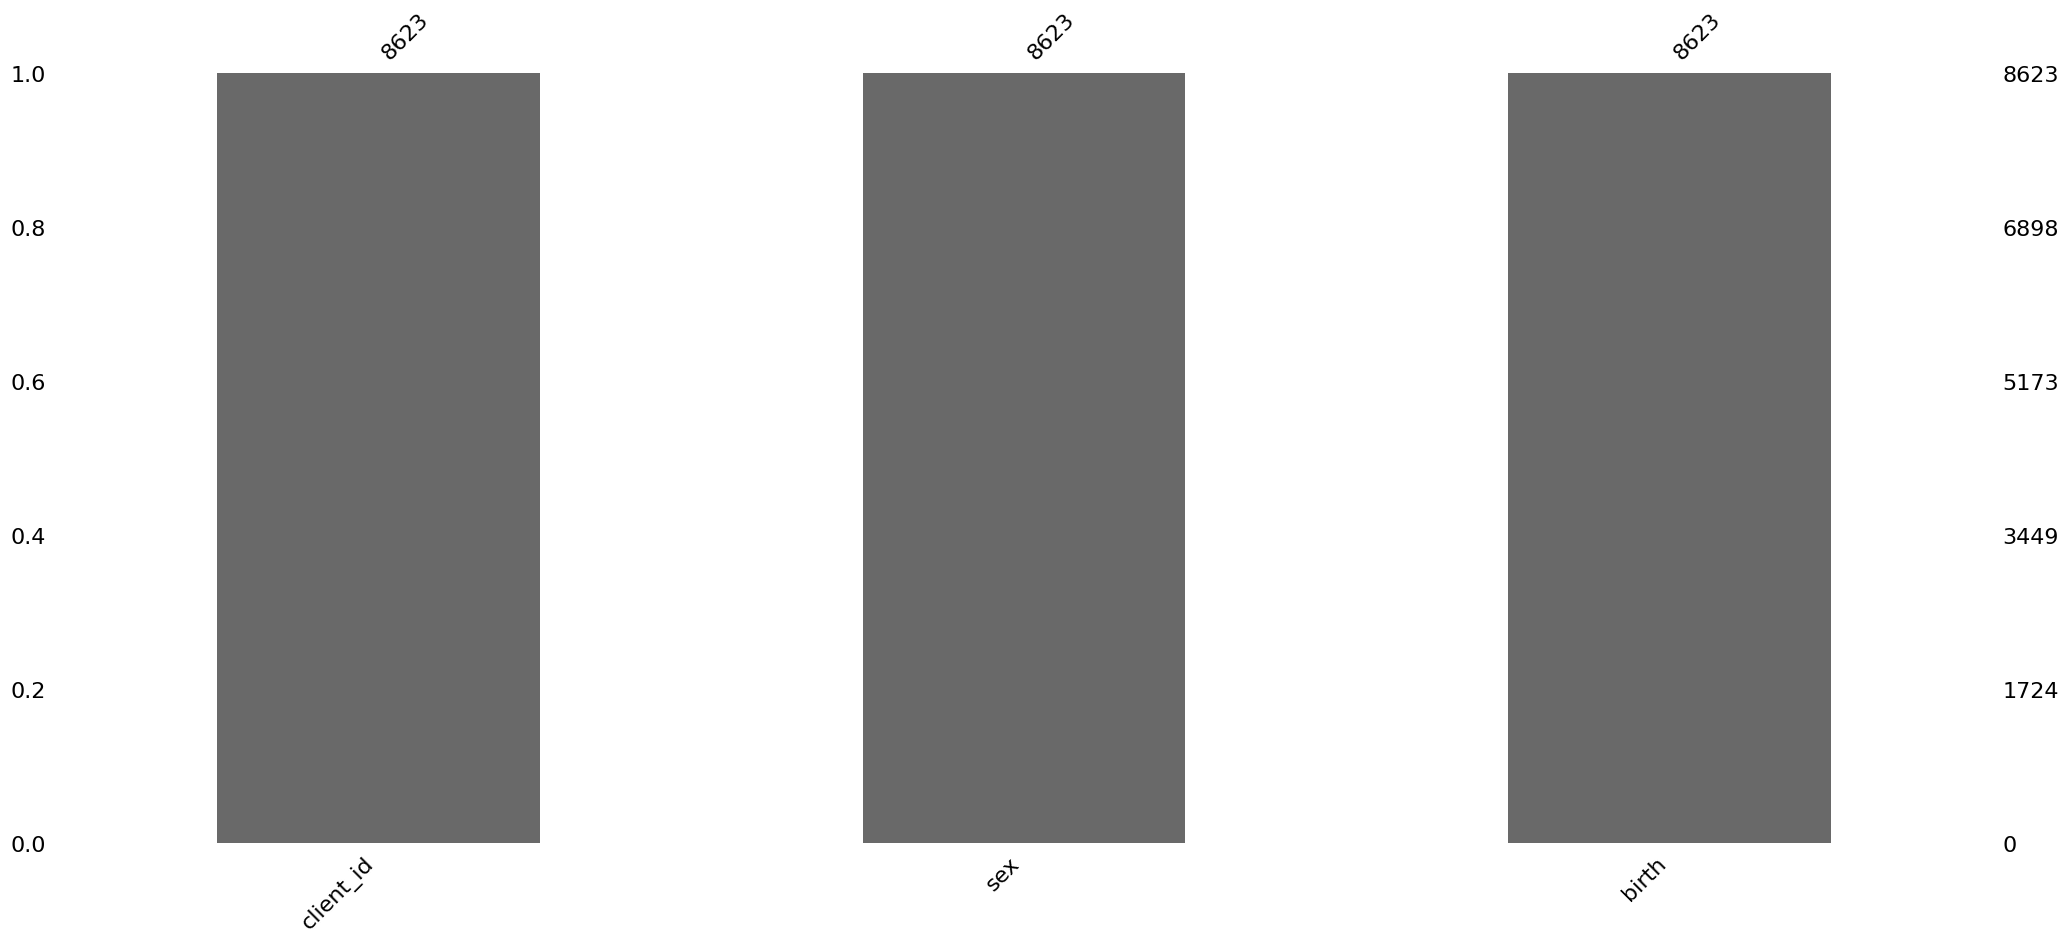

In [16]:
# On vérifie si il y a des données manquantes 
msno.bar(Clients)

# Produits

In [17]:
Produits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3287 entries, 0 to 3286
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id_prod  3287 non-null   object 
 1   price    3287 non-null   float64
 2   categ    3287 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 77.2+ KB


In [18]:
Produits.head()

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0


In [19]:
doublons(Produits)

0 doublons


In [20]:
Produits['categ'].unique()
# on peut voir qu'il existe trois catégories de Produits 0,1,2

array([0, 1, 2], dtype=int64)

In [21]:
round(Produits.describe(include='all'),2)

,id_prod,price,categ
count,3287,3287.00,3287.00
unique,3287,NaN,NaN
top,0_1421,NaN,NaN
freq,1,NaN,NaN
mean,NaN,21.86,0.37
std,NaN,29.85,0.62
min,NaN,-1.00,0.00
25%,NaN,6.99,0.00
50%,NaN,13.06,0.00
75%,NaN,22.99,1.00


In [22]:
# On peut voir qu'il y a un prix en négatif ce qui ne peut être possible
Produits.loc[Produits['price']<0]

,id_prod,price,categ
731,T_0,-1.0,0


In [23]:
 print('Le prix min est de -1 € et le max est de 300€')
print('La moyenne de prix est de 21,85€ et la mediane de 13,06€ la moyenne est donc supérieur')
print('25% des valeurs sont en dessous du premier quartile et 75% des valeurs sont en dessous du troisième quartile')

Le prix min est de -1 € et le max est de 300€
La moyenne de prix est de 21,85€ et la mediane de 13,06€ la moyenne est donc supérieur
25% des valeurs sont en dessous du premier quartile et 75% des valeurs sont en dessous du troisième quartile


In [24]:
print('Le mode est de',round(Produits['price'].mode(),2))
print('La variance empirique est de',round(Produits['price'].var(ddof=0),2))
print('Le coefficient de variation est de',round(Produits['price'].std()/Produits['price'].mean(),2)*100)
print('Le skewness est de',round(Produits['price'].skew(),2))


Le mode est de 0    4.99
Name: price, dtype: float64
La variance empirique est de 890.63
Le coefficient de variation est de 137.0
Le skewness est de 3.8


Text(0.5, 1.0, 'Représentation graphique avec moyenne et médiane')

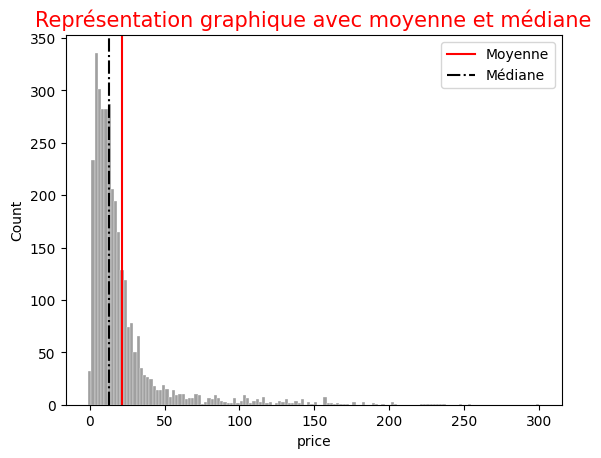

In [25]:
moyenne=Produits['price'].mean()
médiane=Produits['price'].median()
sns.histplot(data=Produits,x='price',color='grey',edgecolor='white')
plt.axvline(moyenne, color='Red',linestyle='-')
plt.axvline(médiane, color='black',linestyle='-.')

plt.legend({'Moyenne': moyenne,'Médiane':médiane})
plt.title(label='Représentation graphique avec moyenne et médiane',fontsize=15,color='red')

In [26]:
Q1=Produits['price'].quantile(q=0.25, interpolation='midpoint')
Q3=Produits['price'].quantile(q=0.75, interpolation='midpoint')
IQ=Q3-Q1
Lim_outlier_inf=round((Q1-1.5*IQ),2)
Lim_outlier_sup=round((Q3+1.5*IQ),2)

Outliers_inf=Produits['price']<Lim_outlier_inf
Outliers_sup=Produits['price']>Lim_outlier_sup

print('Limites des outliers inférieurs',Lim_outlier_inf,'€')
print('Les index des outliers inférieurs sont : ',np.where(Outliers_inf[0],))

print('Limites des outliers supérieur',Lim_outlier_sup,'€')
print('Les index des outliers supérieur sont :',np.where(Outliers_sup)[0],)
print("Le nombre d'outliers est  supérieur à ", len(np.where(Outliers_sup)[0],))

Limites des outliers inférieurs -17.01 €
Les index des outliers inférieurs sont :  (array([], dtype=int64),)
Limites des outliers supérieur 46.99 €
Les index des outliers supérieur sont : [  10   11   38   49   64   73   79   95  102  104  106  107  117  137
  167  173  187  199  204  214  217  241  245  246  252  272  289  297
  307  315  323  340  359  360  381  387  394  411  420  422  432  453
  456  465  468  489  492  499  503  509  522  531  562  595  600  614
  622  644  703  706  709  719  724  743  749  754  763  767  786  792
  808  817  824  828  852  853  876  879  901  905  918  921  925  933
  934  938  947  954  966  970  972  976  993  998 1005 1008 1009 1011
 1032 1036 1044 1073 1076 1094 1100 1101 1117 1212 1222 1226 1243 1253
 1268 1272 1284 1309 1315 1323 1348 1351 1366 1371 1378 1390 1402 1411
 1436 1437 1464 1480 1488 1504 1507 1509 1532 1536 1538 1547 1563 1567
 1570 1589 1604 1630 1670 1675 1695 1696 1709 1715 1721 1727 1729 1748
 1767 1771 1779 1793 1797 1814 

<AxesSubplot: xlabel='price'>

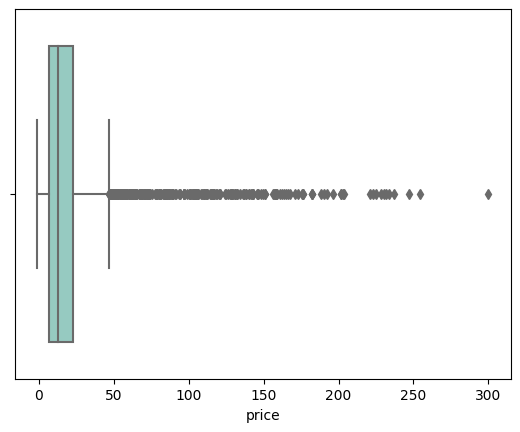

In [27]:
#Representation des outliers sur notre variable prix
sns.boxplot(x=Produits['price'],palette='Set3')

<AxesSubplot: >

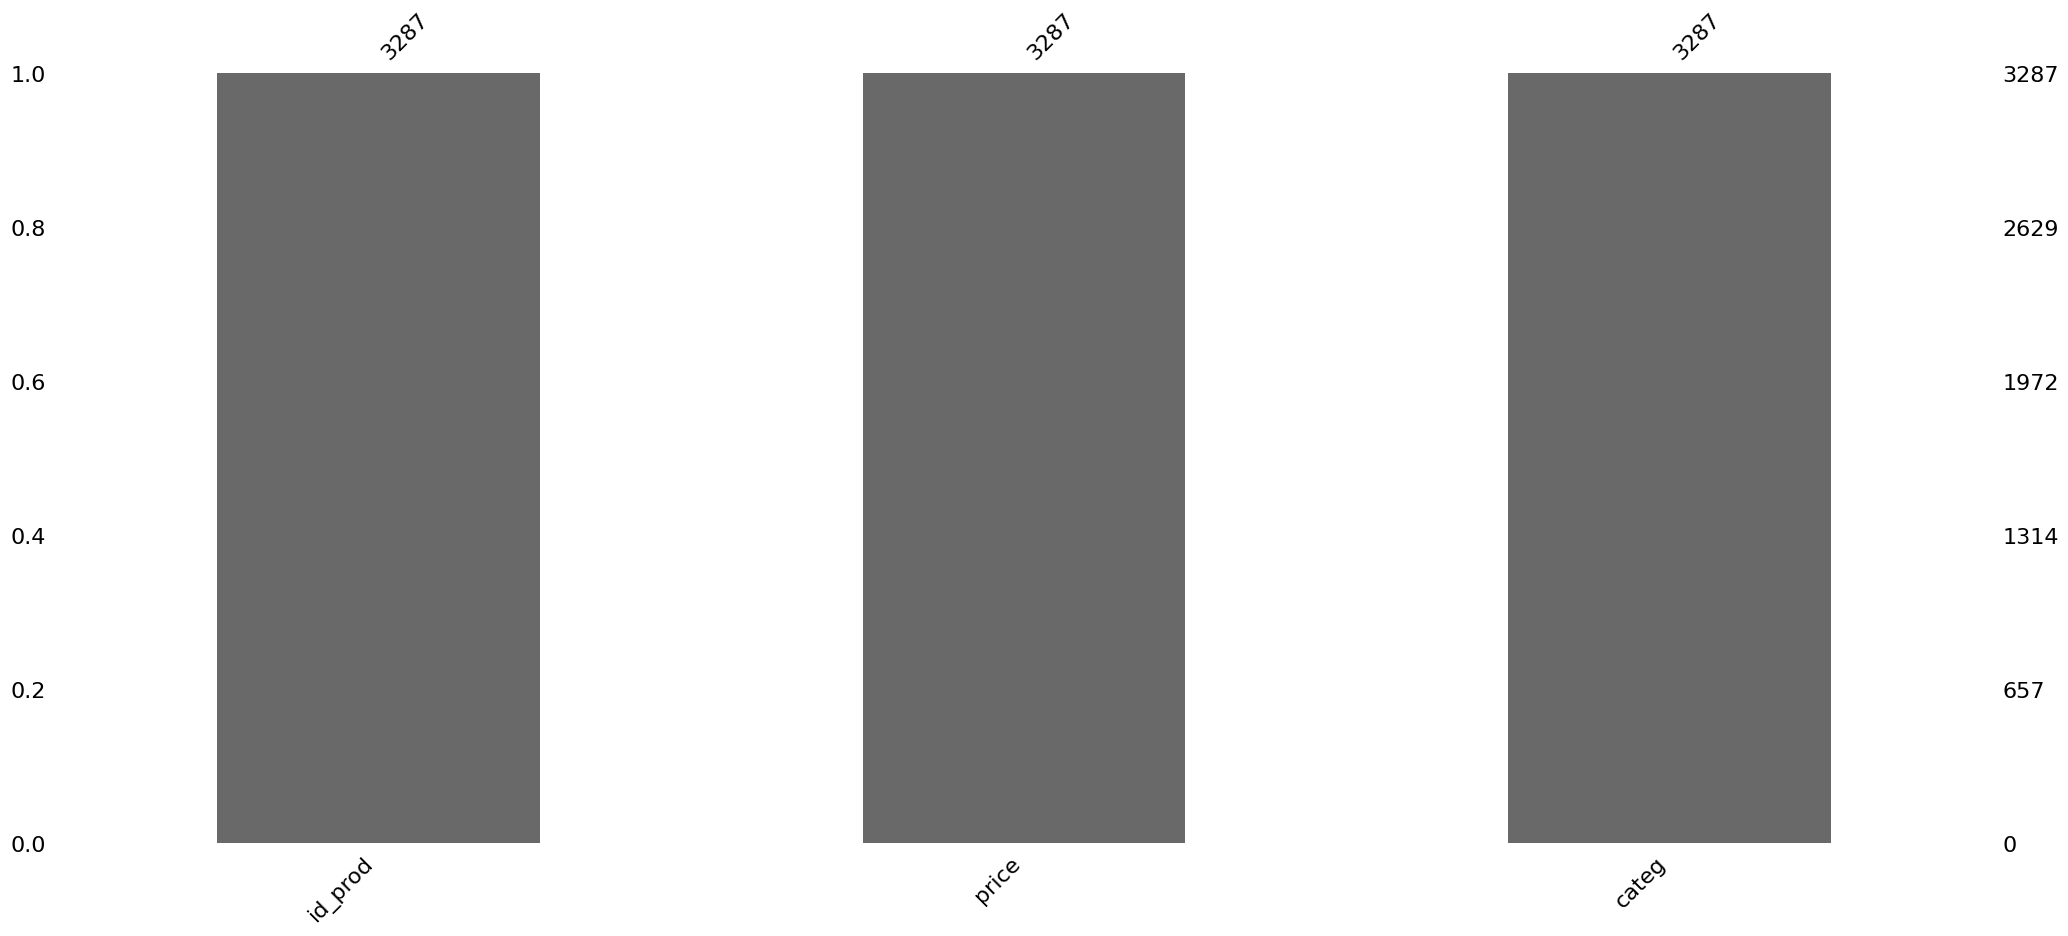

In [28]:
msno.bar(Produits)

# Transactions

In [29]:
Transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679532 entries, 0 to 679531
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id_prod     679532 non-null  object
 1   date        679532 non-null  object
 2   session_id  679532 non-null  object
 3   client_id   679532 non-null  object
dtypes: object(4)
memory usage: 20.7+ MB


In [30]:
Transactions.head(10)

,id_prod,date,session_id,client_id
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232
5,0_1418,2022-10-20 15:59:16.084030,s_285425,c_1478
6,0_1475,2022-06-03 04:45:09.871601,s_218033,c_7782
7,0_2110,2021-06-26 14:48:55.311418,s_54122,c_7456
8,0_1156,2022-12-27 12:27:40.641366,s_318058,c_7363
9,1_299,2021-11-29 15:54:25.880121,s_126880,c_1847


In [31]:
Transactions.describe(include='all')

,id_prod,date,session_id,client_id
count,679532,679532,679532,679532
unique,3267,679371,342316,8602
top,1_369,test_2021-03-01 02:30:02.237413,s_0,c_1609
freq,2252,13,200,25488


In [32]:
doublons(Transactions)
# On peut voir que 126 doublons sont présents sur notre Dataframe

126 doublons


In [33]:
Transactions.loc[Transactions.duplicated()]
# On peut voir que parmis les doublons nous avons des test qui été effectué avec le la session_id s_0

,id_prod,date,session_id,client_id
27778,T_0,test_2021-03-01 02:30:02.237437,s_0,ct_1
52424,T_0,test_2021-03-01 02:30:02.237419,s_0,ct_0
96687,T_0,test_2021-03-01 02:30:02.237412,s_0,ct_1
130188,T_0,test_2021-03-01 02:30:02.237419,s_0,ct_0
139339,T_0,test_2021-03-01 02:30:02.237443,s_0,ct_1
...,...,...,...,...
653098,T_0,test_2021-03-01 02:30:02.237432,s_0,ct_0
657830,T_0,test_2021-03-01 02:30:02.237417,s_0,ct_0
662081,T_0,test_2021-03-01 02:30:02.237427,s_0,ct_1
671647,T_0,test_2021-03-01 02:30:02.237424,s_0,ct_1


In [34]:
Transactions=Transactions.drop_duplicates()
Transactions

,id_prod,date,session_id,client_id
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232
...,...,...,...,...
679527,0_1551,2022-01-15 13:05:06.246925,s_150195,c_8489
679528,1_639,2022-03-19 16:03:23.429229,s_181434,c_4370
679529,0_1425,2022-12-20 04:33:37.584749,s_314704,c_304
679530,0_1994,2021-07-16 20:36:35.350579,s_63204,c_2227


In [35]:
# On peut voir que les lignes de test sont toujours apparente nous allons les garder afin de voir leur lien dans la jointure finale
Transactions.sort_values(ascending=False, by='date' )

,id_prod,date,session_id,client_id
246980,T_0,test_2021-03-01 02:30:02.237450,s_0,ct_0
670680,T_0,test_2021-03-01 02:30:02.237449,s_0,ct_1
19312,T_0,test_2021-03-01 02:30:02.237449,s_0,ct_0
392443,T_0,test_2021-03-01 02:30:02.237448,s_0,ct_0
312697,T_0,test_2021-03-01 02:30:02.237447,s_0,ct_1
...,...,...,...,...
439073,0_1358,2021-03-01 00:05:18.801198,s_5,c_2033
488300,0_1458,2021-03-01 00:04:54.559692,s_4,c_7912
462702,0_1352,2021-03-01 00:02:38.311413,s_3,c_580
428477,0_1390,2021-03-01 00:02:26.047414,s_2,c_664


In [36]:
# On vérifie que nos données on bien le bon format
Transactions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679406 entries, 0 to 679531
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id_prod     679406 non-null  object
 1   date        679406 non-null  object
 2   session_id  679406 non-null  object
 3   client_id   679406 non-null  object
dtypes: object(4)
memory usage: 25.9+ MB


In [37]:
Transactions

,id_prod,date,session_id,client_id
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232
...,...,...,...,...
679527,0_1551,2022-01-15 13:05:06.246925,s_150195,c_8489
679528,1_639,2022-03-19 16:03:23.429229,s_181434,c_4370
679529,0_1425,2022-12-20 04:33:37.584749,s_314704,c_304
679530,0_1994,2021-07-16 20:36:35.350579,s_63204,c_2227


# Jointure 

In [38]:
Transactions_final=pd.merge(Transactions,Produits, how='left', on='id_prod')
Data_final=pd.merge(Transactions_final,Clients, how='left', on='client_id')

In [39]:
Data_final

,id_prod,date,session_id,client_id,price,categ,sex,birth
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,4.18,0.0,f,1986
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534,15.99,1.0,m,1988
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714,7.99,0.0,f,1968
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941,69.99,2.0,m,2000
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232,4.99,0.0,m,1980
...,...,...,...,...,...,...,...,...
679401,0_1551,2022-01-15 13:05:06.246925,s_150195,c_8489,12.99,0.0,f,1951
679402,1_639,2022-03-19 16:03:23.429229,s_181434,c_4370,10.99,1.0,f,1977
679403,0_1425,2022-12-20 04:33:37.584749,s_314704,c_304,12.99,0.0,f,1988
679404,0_1994,2021-07-16 20:36:35.350579,s_63204,c_2227,4.98,0.0,m,1986


In [40]:
doublons(Data_final)

0 doublons


In [41]:
Data_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679406 entries, 0 to 679405
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id_prod     679406 non-null  object 
 1   date        679406 non-null  object 
 2   session_id  679406 non-null  object 
 3   client_id   679406 non-null  object 
 4   price       679185 non-null  float64
 5   categ       679185 non-null  float64
 6   sex         679406 non-null  object 
 7   birth       679406 non-null  int64  
dtypes: float64(2), int64(1), object(5)
memory usage: 46.7+ MB


In [42]:
# On Analyse maintenant la jointure faite tout les produits dont l'id est 0 et on peut voir dans un premier temps que le prix est de -1 en plus d'avoir des dates Test
Test_0=Data_final.loc[Data_final['id_prod']=='T_0']
Test_0

,id_prod,date,session_id,client_id,price,categ,sex,birth
3019,T_0,test_2021-03-01 02:30:02.237419,s_0,ct_0,-1.0,0.0,f,2001
5138,T_0,test_2021-03-01 02:30:02.237425,s_0,ct_0,-1.0,0.0,f,2001
9668,T_0,test_2021-03-01 02:30:02.237437,s_0,ct_1,-1.0,0.0,m,2001
10728,T_0,test_2021-03-01 02:30:02.237436,s_0,ct_0,-1.0,0.0,f,2001
15292,T_0,test_2021-03-01 02:30:02.237430,s_0,ct_0,-1.0,0.0,f,2001
...,...,...,...,...,...,...,...,...
577222,T_0,test_2021-03-01 02:30:02.237424,s_0,ct_0,-1.0,0.0,f,2001
592959,T_0,test_2021-03-01 02:30:02.237422,s_0,ct_1,-1.0,0.0,m,2001
607783,T_0,test_2021-03-01 02:30:02.237412,s_0,ct_0,-1.0,0.0,f,2001
625936,T_0,test_2021-03-01 02:30:02.237422,s_0,ct_0,-1.0,0.0,f,2001


In [43]:
Data_final=Data_final.drop(Test_0.index)
Data_final

,id_prod,date,session_id,client_id,price,categ,sex,birth
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,4.18,0.0,f,1986
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534,15.99,1.0,m,1988
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714,7.99,0.0,f,1968
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941,69.99,2.0,m,2000
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232,4.99,0.0,m,1980
...,...,...,...,...,...,...,...,...
679401,0_1551,2022-01-15 13:05:06.246925,s_150195,c_8489,12.99,0.0,f,1951
679402,1_639,2022-03-19 16:03:23.429229,s_181434,c_4370,10.99,1.0,f,1977
679403,0_1425,2022-12-20 04:33:37.584749,s_314704,c_304,12.99,0.0,f,1988
679404,0_1994,2021-07-16 20:36:35.350579,s_63204,c_2227,4.98,0.0,m,1986


In [44]:
# Modification du format Date

Data_final['date']=pd.to_datetime(Data_final['date'],errors='coerce')


In [45]:
#On peut voir que la colonne date n'est pas au bon format nous allons donc le modifier et ajouter des colonnes année et mois pour affiner notre étude
Data_final["Année"] = Data_final["date"].dt.year
Data_final["Mois"] = Data_final["date"].dt.month
Data_final["Jour"] = Data_final["date"].dt.day

In [46]:
Data_final['date']=pd.to_datetime(Data_final['date'].dt.strftime('%Y-%m-%d'))

In [47]:
print(Data_final.isnull().sum())

id_prod         0
date            0
session_id      0
client_id       0
price         221
categ         221
sex             0
birth           0
Année           0
Mois            0
Jour            0
dtype: int64


#On peut remarquer dans un premier à la lecture du fichier que l'id-produit est composé en premier lieu du chiffre de la catégorie à laquelle il appartient 

In [48]:
Data_final[Data_final['price'].isnull()& Data_final['categ'].isnull()]
# On peut voir qu'en faisant la recherche de nos Nan un id_prod reviens souvent reste à confimer

,id_prod,date,session_id,client_id,price,categ,sex,birth,Année,Mois,Jour
2633,0_2245,2022-09-23,s_272266,c_4746,NaN,NaN,m,1940,2022,9,23
10106,0_2245,2022-07-23,s_242482,c_6713,NaN,NaN,f,1963,2022,7,23
11727,0_2245,2022-12-03,s_306338,c_5108,NaN,NaN,m,1978,2022,12,3
15675,0_2245,2021-08-16,s_76493,c_1391,NaN,NaN,m,1991,2021,8,16
16377,0_2245,2022-07-16,s_239078,c_7954,NaN,NaN,m,1973,2022,7,16
...,...,...,...,...,...,...,...,...,...,...,...
669606,0_2245,2021-08-25,s_80395,c_131,NaN,NaN,m,1981,2021,8,25
670558,0_2245,2022-03-06,s_175311,c_4167,NaN,NaN,f,1979,2022,3,6
671162,0_2245,2022-05-16,s_209381,c_4453,NaN,NaN,m,1981,2022,5,16
675554,0_2245,2022-02-11,s_163405,c_1098,NaN,NaN,m,1986,2022,2,11


In [49]:
prod_2245=Data_final.loc[Data_final['id_prod']== '0_2245']
prod_2245
#On peut voir que les lignes ne concerne que l'id_prod 2245

,id_prod,date,session_id,client_id,price,categ,sex,birth,Année,Mois,Jour
2633,0_2245,2022-09-23,s_272266,c_4746,NaN,NaN,m,1940,2022,9,23
10106,0_2245,2022-07-23,s_242482,c_6713,NaN,NaN,f,1963,2022,7,23
11727,0_2245,2022-12-03,s_306338,c_5108,NaN,NaN,m,1978,2022,12,3
15675,0_2245,2021-08-16,s_76493,c_1391,NaN,NaN,m,1991,2021,8,16
16377,0_2245,2022-07-16,s_239078,c_7954,NaN,NaN,m,1973,2022,7,16
...,...,...,...,...,...,...,...,...,...,...,...
669606,0_2245,2021-08-25,s_80395,c_131,NaN,NaN,m,1981,2021,8,25
670558,0_2245,2022-03-06,s_175311,c_4167,NaN,NaN,f,1979,2022,3,6
671162,0_2245,2022-05-16,s_209381,c_4453,NaN,NaN,m,1981,2022,5,16
675554,0_2245,2022-02-11,s_163405,c_1098,NaN,NaN,m,1986,2022,2,11


In [50]:
Data_final['categ']=Data_final['categ'].fillna(0)
prod_2245=Data_final[Data_final['id_prod']== '0_2245']
prod_2245

,id_prod,date,session_id,client_id,price,categ,sex,birth,Année,Mois,Jour
2633,0_2245,2022-09-23,s_272266,c_4746,NaN,0.0,m,1940,2022,9,23
10106,0_2245,2022-07-23,s_242482,c_6713,NaN,0.0,f,1963,2022,7,23
11727,0_2245,2022-12-03,s_306338,c_5108,NaN,0.0,m,1978,2022,12,3
15675,0_2245,2021-08-16,s_76493,c_1391,NaN,0.0,m,1991,2021,8,16
16377,0_2245,2022-07-16,s_239078,c_7954,NaN,0.0,m,1973,2022,7,16
...,...,...,...,...,...,...,...,...,...,...,...
669606,0_2245,2021-08-25,s_80395,c_131,NaN,0.0,m,1981,2021,8,25
670558,0_2245,2022-03-06,s_175311,c_4167,NaN,0.0,f,1979,2022,3,6
671162,0_2245,2022-05-16,s_209381,c_4453,NaN,0.0,m,1981,2022,5,16
675554,0_2245,2022-02-11,s_163405,c_1098,NaN,0.0,m,1986,2022,2,11


#il faut maintenant déterminer le prix pour ce produit

#Nous pouvons maintenant vérifier les tendances du prix avec des mesures centrales

In [51]:
print('Catégorie:',
     '\n- prix Moyen:',round(Data_final[Data_final['categ']==0]['price'].mean(),2),
      '\n- prix Médian:',round(Data_final[Data_final['categ']==0]['price'].median(),2),
     '\n- Mode:',Data_final[Data_final['categ']==0]['price'].mode())

Catégorie: 
- prix Moyen: 10.64 
- prix Médian: 9.99 
- Mode: 0    4.99
Name: price, dtype: float64


In [52]:
prod_2245=Data_final[Data_final['id_prod']== '0_2245']
imputer = SimpleImputer(strategy='median', missing_values=np.nan)
imputer = imputer.fit(prod_2245[['price']])
prod_2245['price'] = imputer.transform(prod_2245[['price']])
prod_2245

C:\Users\33682\AppData\Local\Temp\ipykernel_26424\620153336.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prod_2245['price'] = imputer.transform(prod_2245[['price']])


,id_prod,date,session_id,client_id,price,categ,sex,birth,Année,Mois,Jour
2633,0_2245,2022-09-23,s_272266,c_4746,NaN,0.0,m,1940,2022,9,23
10106,0_2245,2022-07-23,s_242482,c_6713,NaN,0.0,f,1963,2022,7,23
11727,0_2245,2022-12-03,s_306338,c_5108,NaN,0.0,m,1978,2022,12,3
15675,0_2245,2021-08-16,s_76493,c_1391,NaN,0.0,m,1991,2021,8,16
16377,0_2245,2022-07-16,s_239078,c_7954,NaN,0.0,m,1973,2022,7,16
...,...,...,...,...,...,...,...,...,...,...,...
669606,0_2245,2021-08-25,s_80395,c_131,NaN,0.0,m,1981,2021,8,25
670558,0_2245,2022-03-06,s_175311,c_4167,NaN,0.0,f,1979,2022,3,6
671162,0_2245,2022-05-16,s_209381,c_4453,NaN,0.0,m,1981,2022,5,16
675554,0_2245,2022-02-11,s_163405,c_1098,NaN,0.0,m,1986,2022,2,11


In [53]:
print("Maintenant que nous connaissons la médiane et la moyenne nous pouvons voir qu'elles sont proches contrairement au mode qui est plus bas nous pouvons donc choisir comme valeur commune 9,99€ de plus la médiane est moin sensible aux outliers ")
Data_final['price']=Data_final['price'].fillna(9.99)
prod_2245=Data_final[Data_final['id_prod']== '0_2245']
prod_2245

Maintenant que nous connaissons la médiane et la moyenne nous pouvons voir qu'elles sont proches contrairement au mode qui est plus bas nous pouvons donc choisir comme valeur commune 9,99€ de plus la médiane est moin sensible aux outliers 


,id_prod,date,session_id,client_id,price,categ,sex,birth,Année,Mois,Jour
2633,0_2245,2022-09-23,s_272266,c_4746,9.99,0.0,m,1940,2022,9,23
10106,0_2245,2022-07-23,s_242482,c_6713,9.99,0.0,f,1963,2022,7,23
11727,0_2245,2022-12-03,s_306338,c_5108,9.99,0.0,m,1978,2022,12,3
15675,0_2245,2021-08-16,s_76493,c_1391,9.99,0.0,m,1991,2021,8,16
16377,0_2245,2022-07-16,s_239078,c_7954,9.99,0.0,m,1973,2022,7,16
...,...,...,...,...,...,...,...,...,...,...,...
669606,0_2245,2021-08-25,s_80395,c_131,9.99,0.0,m,1981,2021,8,25
670558,0_2245,2022-03-06,s_175311,c_4167,9.99,0.0,f,1979,2022,3,6
671162,0_2245,2022-05-16,s_209381,c_4453,9.99,0.0,m,1981,2022,5,16
675554,0_2245,2022-02-11,s_163405,c_1098,9.99,0.0,m,1986,2022,2,11


In [54]:
for e in Data_final['categ'].unique():
    print('Catégorie',e)
    print(round(Data_final.loc[Data_final['categ']==e]['price'].describe(),2), '/n')
    print(round(Data_final.loc[Data_final['categ']==e]['price'].mode(),2), '/n')

Catégorie 0.0
count    415680.00
mean         10.64
std           4.93
min           0.62
25%           6.29
50%           9.99
75%          14.45
max          40.99
Name: price, dtype: float64 /n
0    4.99
Name: price, dtype: float64 /n
Catégorie 1.0
count    227169.00
mean         20.49
std           7.58
min           2.00
25%          15.81
50%          19.08
75%          24.98
max          80.99
Name: price, dtype: float64 /n
0    15.99
Name: price, dtype: float64 /n
Catégorie 2.0
count    36483.00
mean        76.21
std         39.75
min         30.99
25%         53.99
50%         62.83
75%         73.72
max        300.00
Name: price, dtype: float64 /n
0    68.99
Name: price, dtype: float64 /n


--------------------
Catégorie 0.0
moy:
 10.637843437259427
med:
 9.99
mod:
 0    4.99
Name: price, dtype: float64
var:
 24.32691596172752
skw:
 0.42268123165344
kur:
 -0.386094921776154


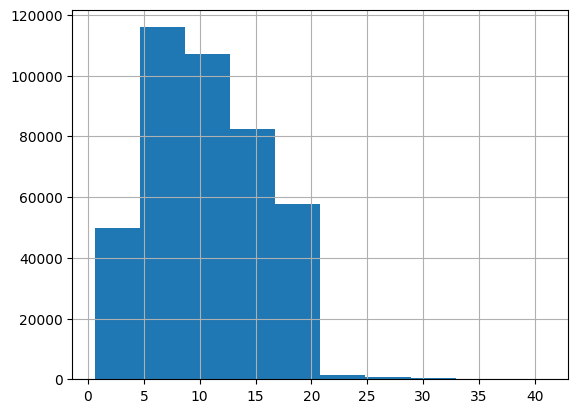

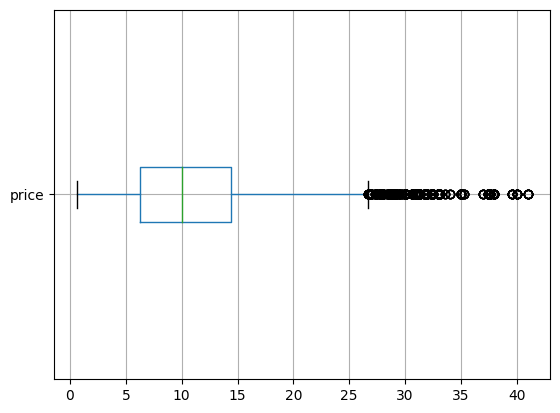

--------------------
Catégorie 1.0
moy:
 20.485729522954276
med:
 19.08
mod:
 0    15.99
Name: price, dtype: float64
var:
 57.530357075678495
skw:
 1.7342372581162098
kur:
 8.164115605848034


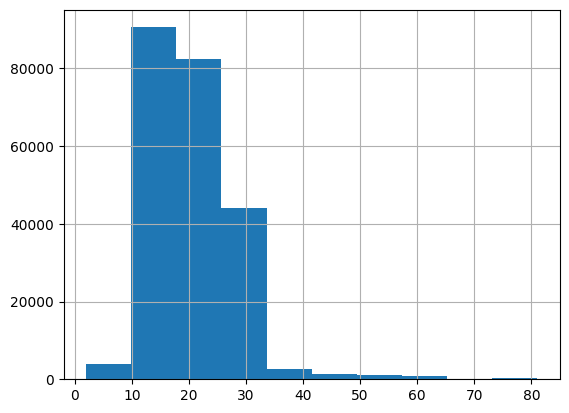

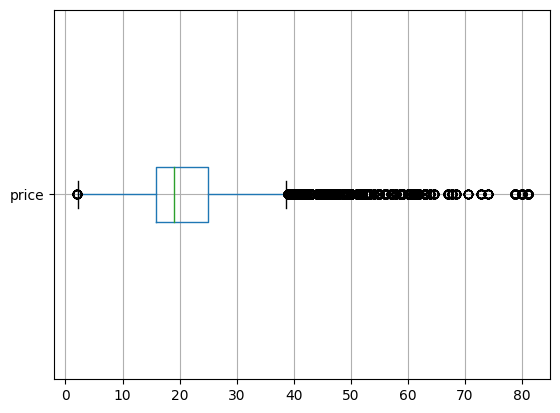

--------------------
Catégorie 2.0
moy:
 76.20741221938987
med:
 62.83
mod:
 0    68.99
Name: price, dtype: float64
var:
 1579.9408534985512
skw:
 2.1835172974115045
kur:
 4.817061548670192


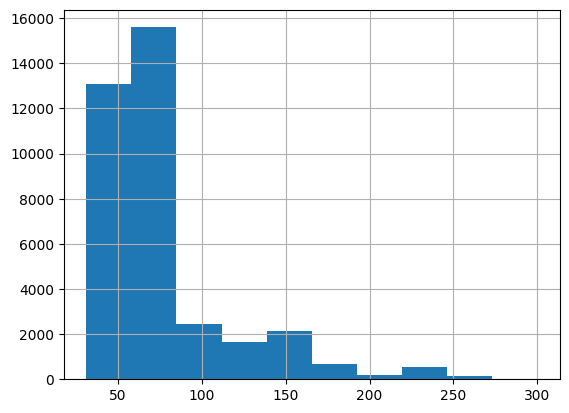

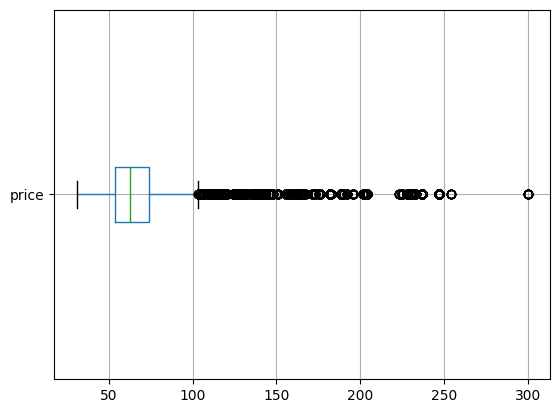

In [55]:
for cat in Data_final["categ"].unique():
    subset = Data_final[Data_final.categ == cat]
    print("-"*20)
    print('Catégorie',cat)
    print("moy:\n",subset['price'].mean())
    print("med:\n",subset['price'].median())
    print("mod:\n",subset['price'].mode())
    print("var:\n",subset['price'].var(ddof=0))
    print("skw:\n",subset['price'].skew())
    print("kur:\n",subset['price'].kurtosis())
    subset["price"].hist()
    plt.show()
    subset.boxplot(column="price", vert=False)
    plt.show()

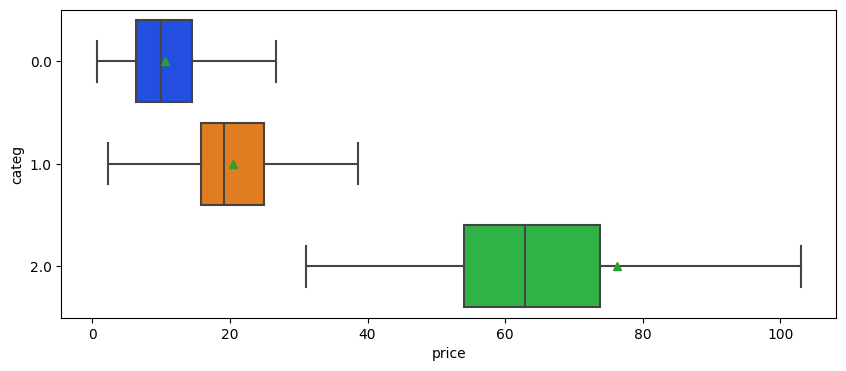

In [56]:
plt.figure(figsize=(10,4))
sns.boxplot(data= Data_final,y='categ',x='price',palette='bright',orient='h',showfliers=False, showmeans=True)
plt.show()

# Les demandes d'Antoine

# Chiffre d'affaire

In [57]:
CA =Data_final['price'].sum()
print("Le chiffre d'affaire total est de ",Data_final['price'].sum(),"Millions d'€ ,")
print("pour un total de", Data_final['session_id'].count(),'ventes.')

Le chiffre d'affaire total est de  11855936.47 Millions d'€ ,
pour un total de 679332 ventes.


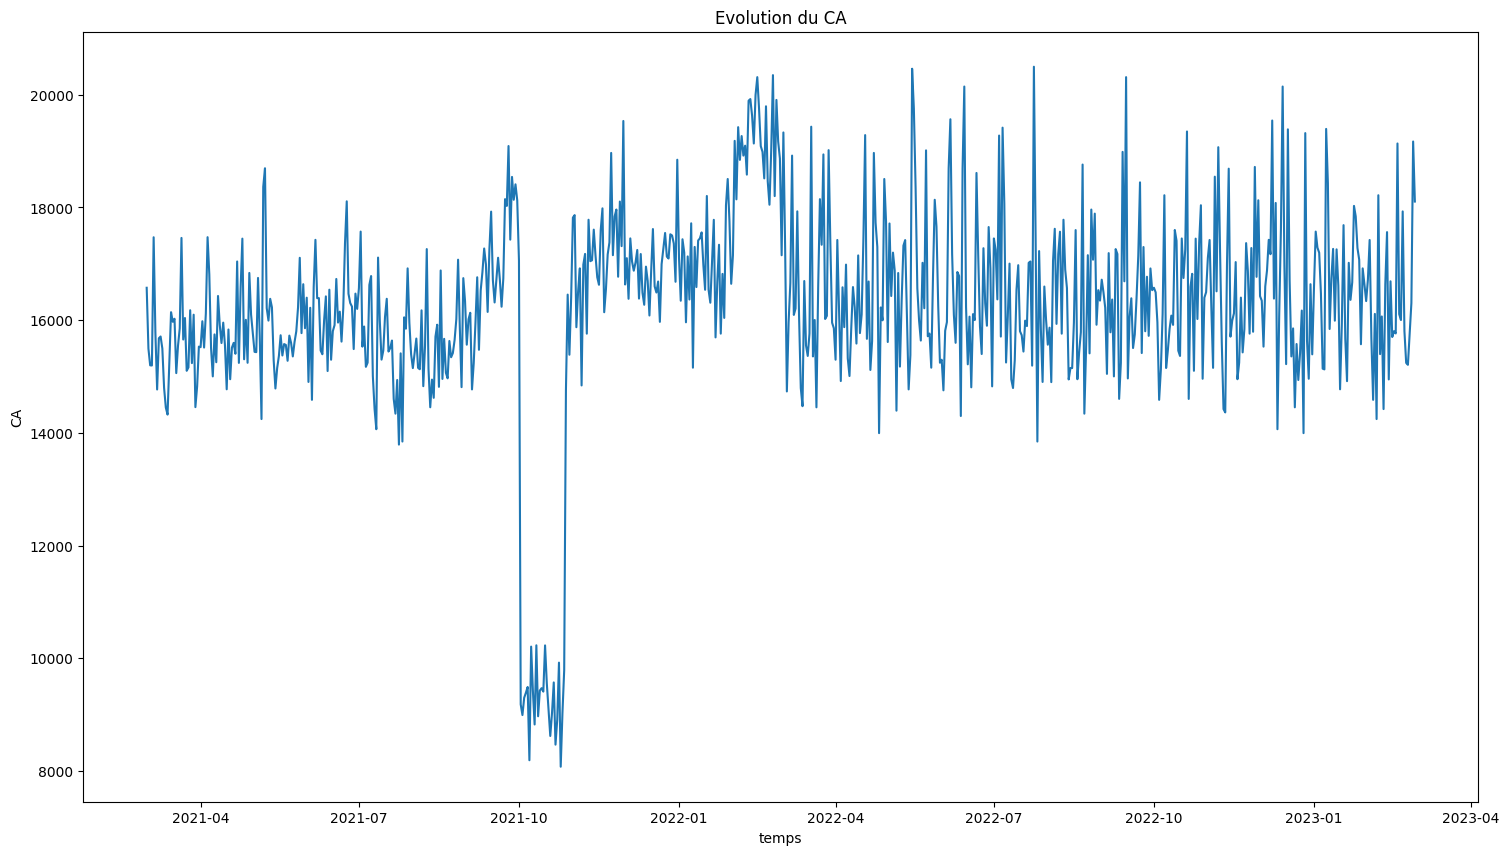

In [58]:
Evolution_CA = pd.pivot_table(Data_final, index ='date', values= "price", aggfunc= 'sum')
Evolution_CA.head()
plt.figure(figsize=(18, 10))
temps = Evolution_CA.index
CA = Evolution_CA["price"]
  
plt.plot(temps, CA)
plt.title('Evolution du CA')
plt.xlabel('temps')
plt.ylabel('CA')
plt.show()

In [59]:
CA_mois = Data_final.groupby(['Année','Mois','categ']).agg({'price'  : sum })
CA_mois = CA_mois.pivot_table('price',['Année','Mois'],'categ')
CA_mois['Total'] = CA_mois[0]+CA_mois[1]+CA_mois[2]


Text(0.5, 1.0, "Evolution Chiffre d'Affaire par Mois")

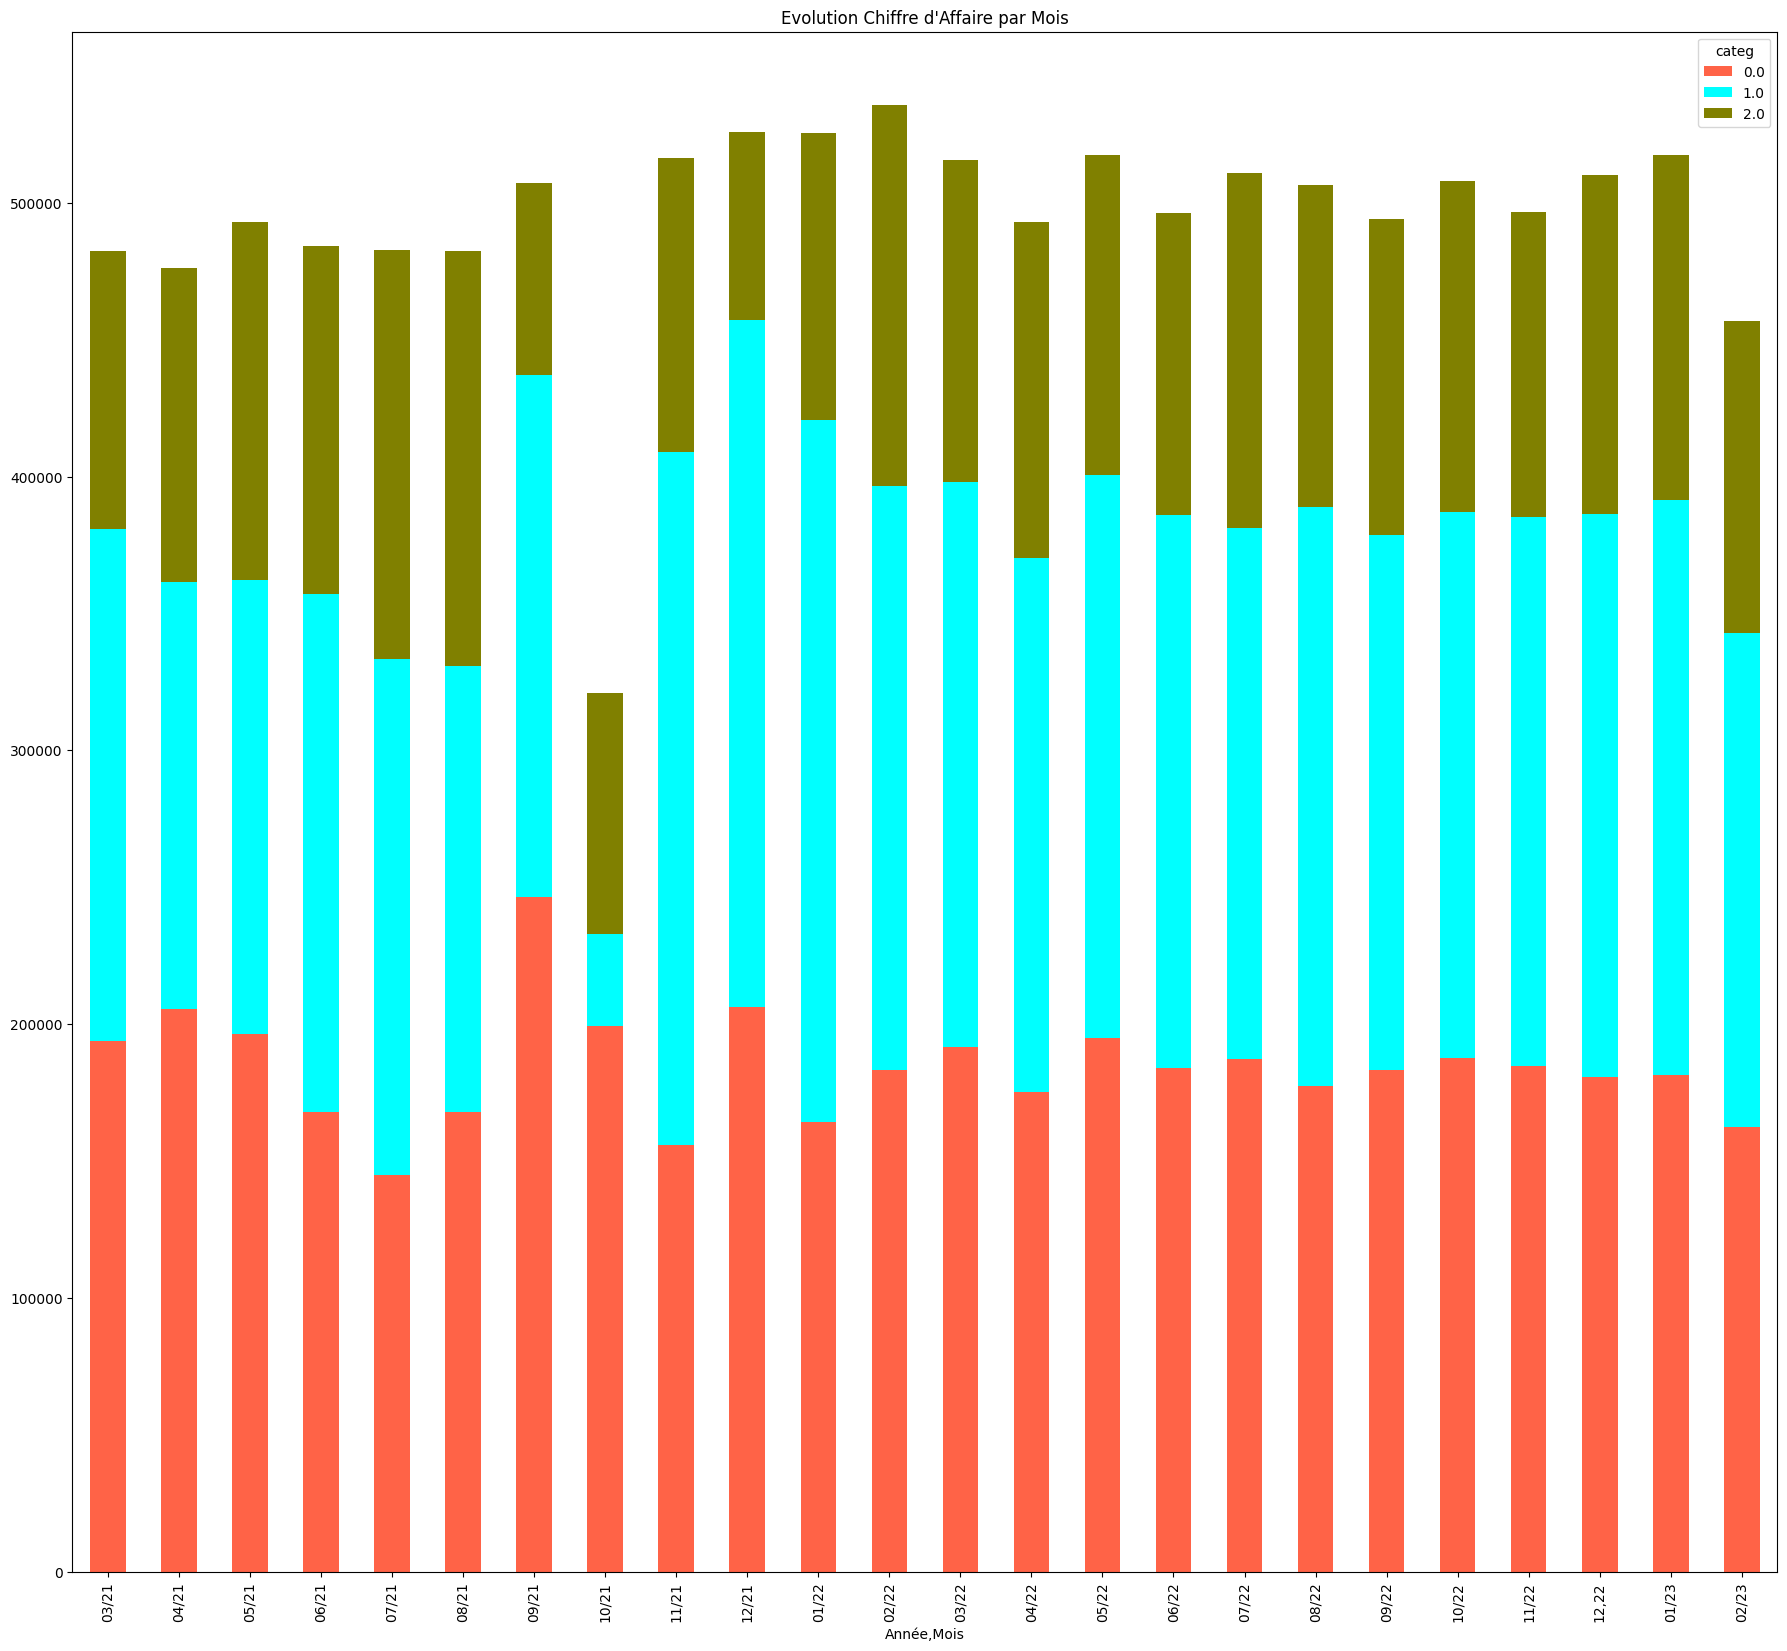

In [60]:
ax = CA_mois.plot(figsize = (22,20),y=[0,1,2],kind='bar',stacked=True , color=['tomato','aqua','olive'])
ax.set_xticklabels(["03/21",'04/21','05/21','06/21','07/21','08/21','09/21','10/21','11/21','12/21','01/22','02/22','03/22',"04/22","05/22","06/22","07/22","08/22","09/22","10/22","11/22","12,22",'01/23','02/23'])
plt.title("Evolution Chiffre d'Affaire par Mois")

Maintenant que nous avons la répartition des produits par catégories nous pouvons déterminer le CA

In [61]:
print("Le chiffre d'affaire par an est de:\n",Data_final.groupby(by='Année')['price'].sum(),)
print("Le nombre de vente est de :\n",Data_final.groupby(by='Année')['session_id'].count())
print("Le prix  moyen est de :\n", round(Data_final.groupby(['categ'])['price'].mean(),2),'€')

Le chiffre d'affaire par an est de:
 Année
2021    4771695.69
2022    6109880.61
2023     974360.17
Name: price, dtype: float64
Le nombre de vente est de :
 Année
2021    278335
2022    346500
2023     54497
Name: session_id, dtype: int64
Le prix  moyen est de :
 categ
0.0    10.64
1.0    20.49
2.0    76.21
Name: price, dtype: float64 €


Nous pouvons voir que le nombre de vente sur l'année 2023 car nous n'avons pas toute les données concernant cette année

In [62]:
print(Data_final['date'].nlargest(1))

364   2023-02-28
Name: date, dtype: datetime64[ns]


In [63]:
# Notre jeu de donnée à pour fin de date le 28 févirer 2023 il faudra donc comparer de manière mensuelle pour affiner notre étude.

In [64]:
# Contrairement à la répartition des transactions ,la répartition du chiffre d'affaire est  plus importante pour les catégories 1 et 2

Text(0.5, 1.0, 'Evolution mensuelle du C.A')

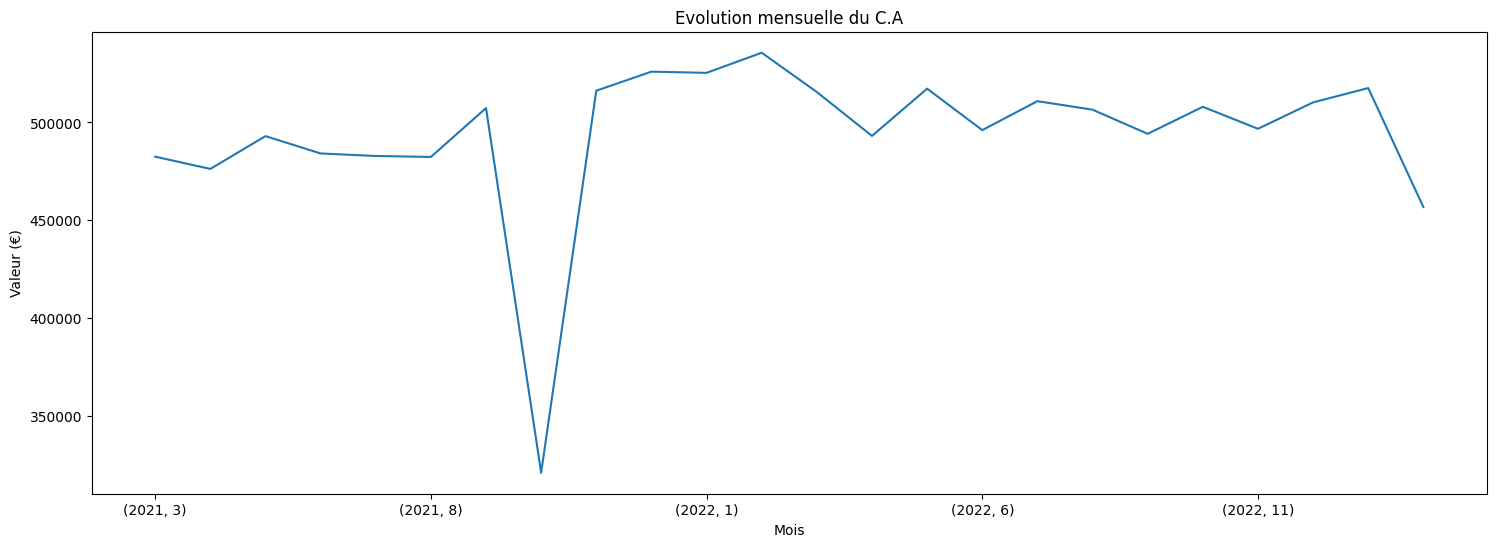

In [65]:

Ca_Mois=Data_final.groupby(['Année','Mois'])['price'].sum()
Ca_Jour=Data_final.groupby(['Jour'])['price'].sum()
plt.figure(figsize=(18,6))
Ca_Mois.plot()
plt.xlabel("Mois")
plt.ylabel("Valeur (€)")
plt.title("Evolution mensuelle du C.A")


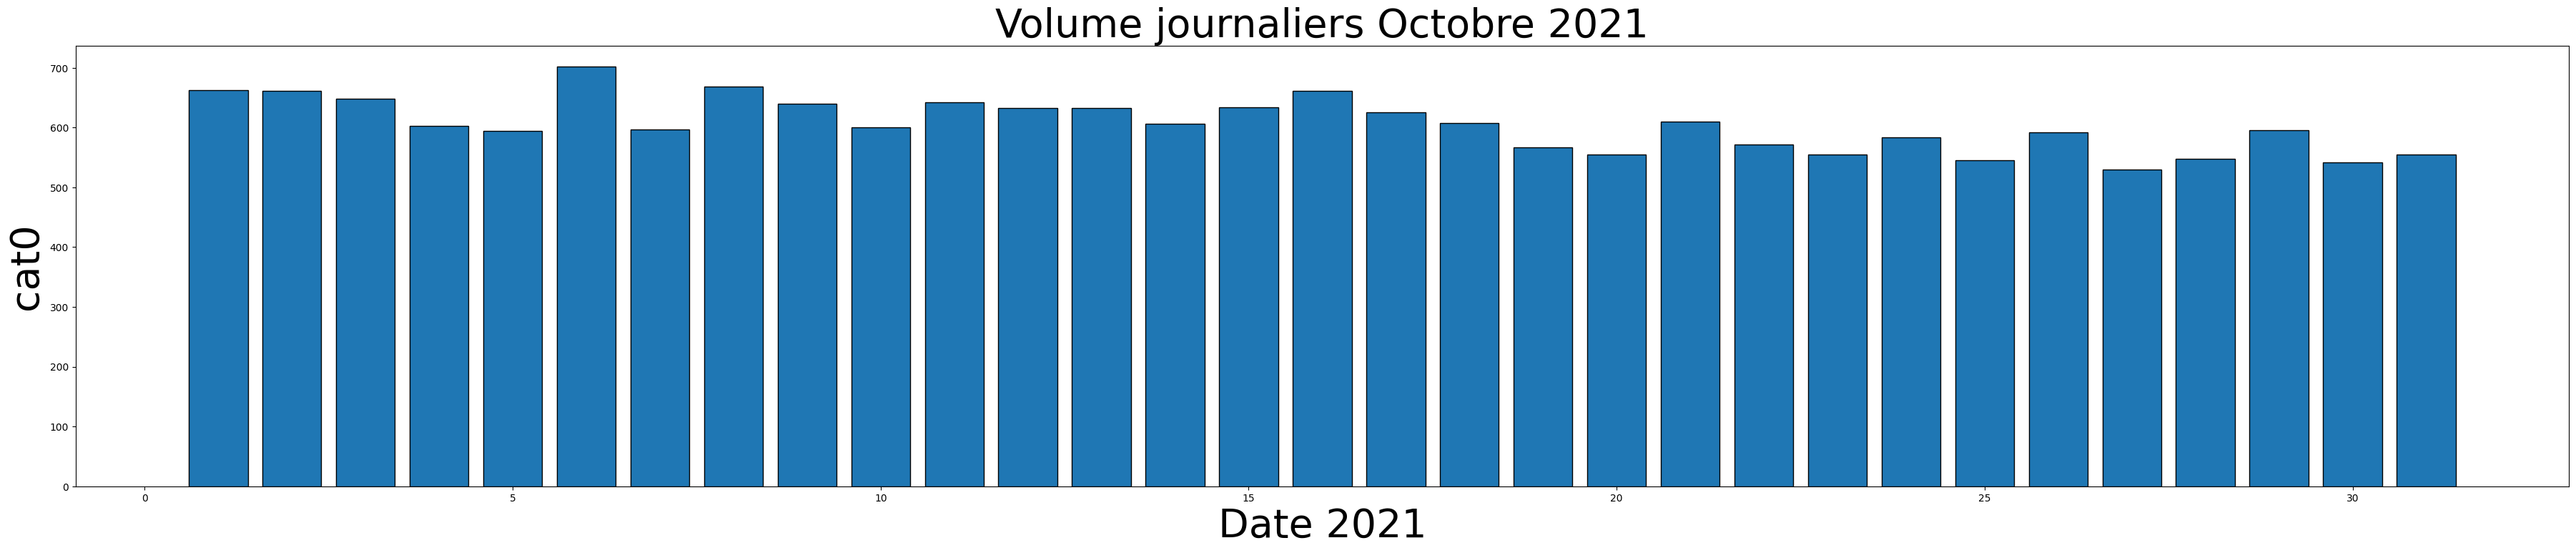

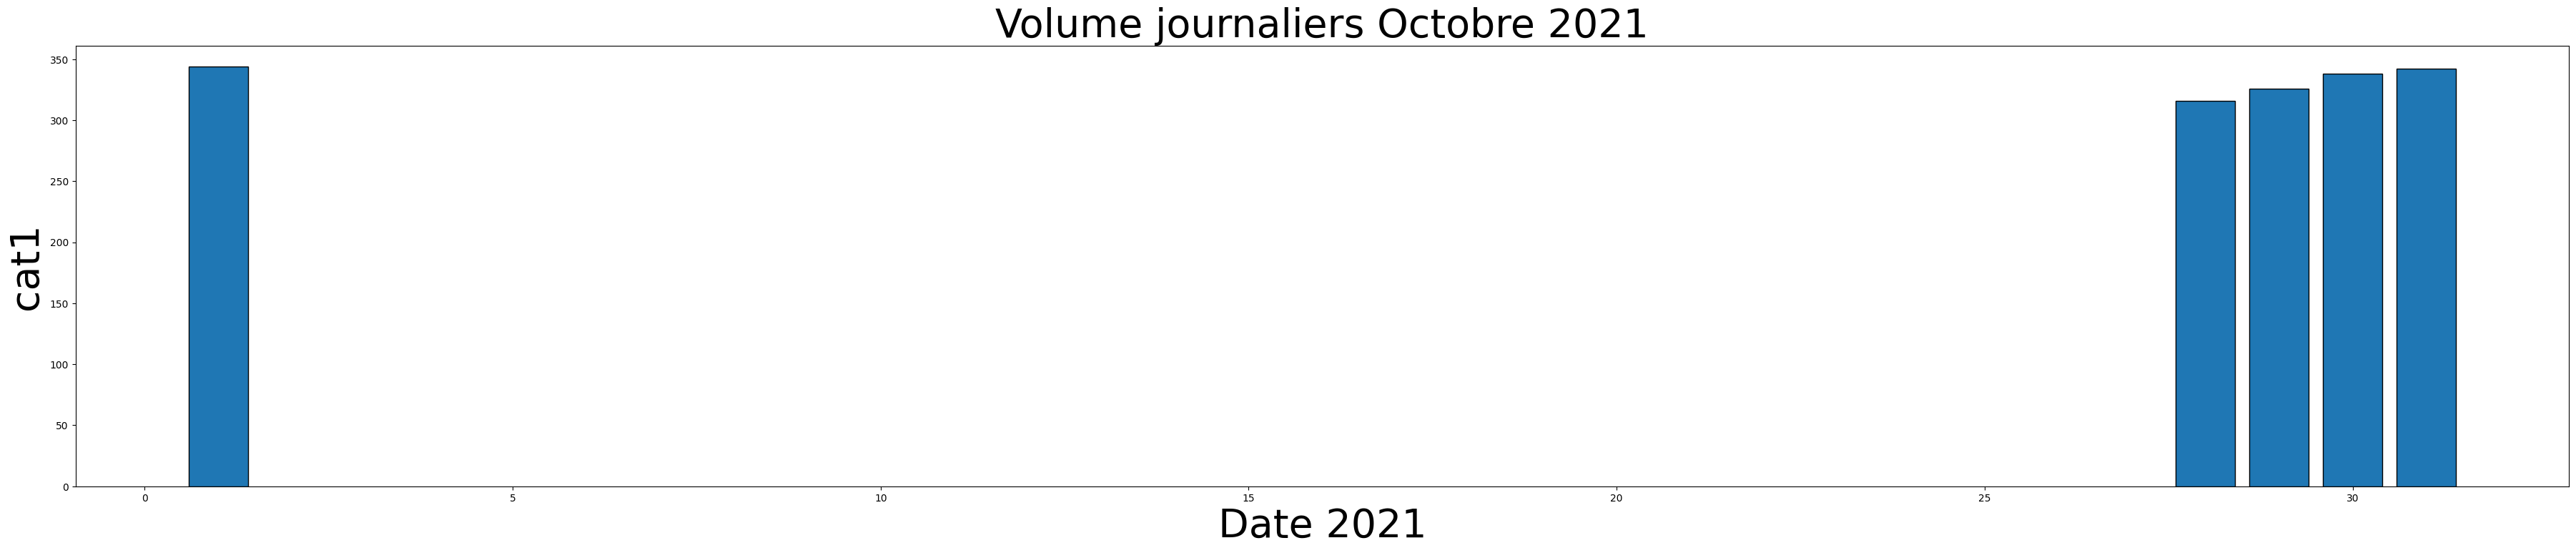

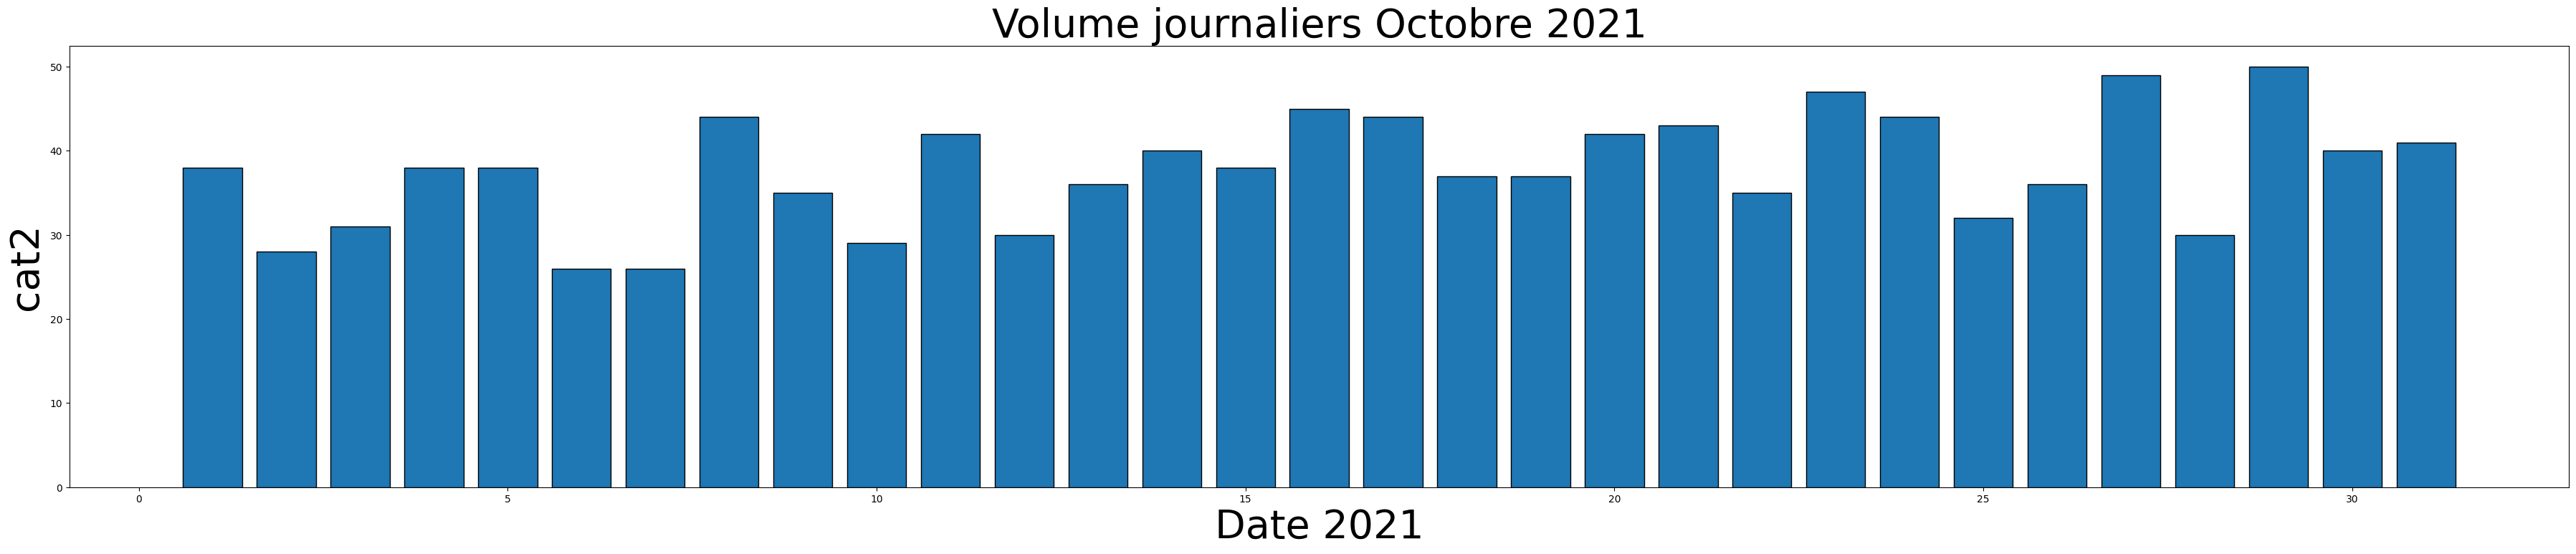

In [66]:
Data_Octobre=Data_final.loc[(Data_final['Année']==2021)&(Data_final['Mois']==10),["Jour","price","categ"]]
Data_Octobre=Data_Octobre.groupby(["Jour","categ"]).agg({'price':['sum','count']}).reset_index()
Data_Octobre.columns = ["Jour", "categ", "Ca", "Volume"]
Data_Octobre = pd.pivot_table(Data_Octobre, columns=["categ"], index=["Jour"]).reset_index()
Data_Octobre.columns = ["Jour", 'Ca_0', 'Ca_1', 'Ca_2', 'Vol_0', 'Vol_1', 'Vol_2']

for i , cat in enumerate ([0,1,2]):
    plt.figure(figsize=(45,8))
    plt.bar(Data_Octobre['Jour'],Data_Octobre[f'Vol_{cat}'], edgecolor='black')
    plt.xlabel('Date 2021', fontsize=40)
    plt.ylabel(f'cat{cat}', fontsize=40)

    plt.title('Volume journaliers Octobre 2021', fontsize=40)
    plt.show()

In [67]:
Data_Octobre=Data_Octobre.drop(columns=['Vol_0','Vol_1','Vol_2'])
Data_Octobre=Data_Octobre.fillna(0)

Text(0.5, 1.0, 'Volume des ventes mensuelle')

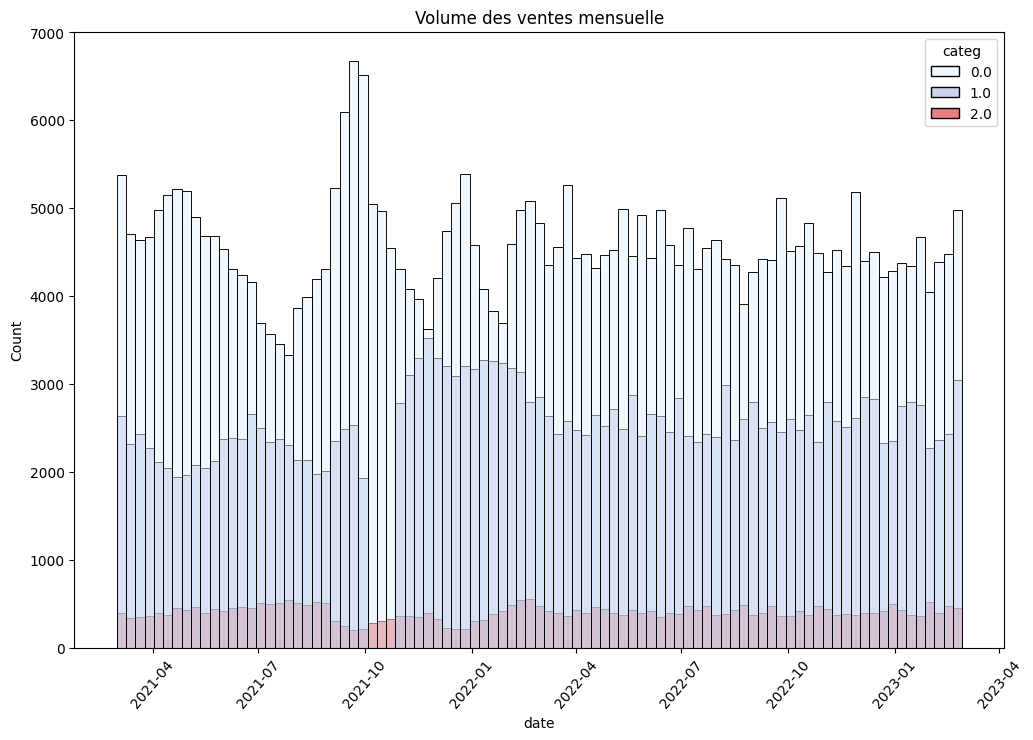

In [68]:
plt.figure(figsize=(12,8))
sns.histplot(data=Data_final, x='date',hue='categ', palette=['#e3f2fd','#9fa8da','#d50000'])
plt.xticks(rotation=50)
plt.title('Volume des ventes mensuelle')

In [69]:
#On remarque que sur la période d'octobre nous n'avons aucune ventes effectué probablement dû à une erreur dans le dataset 

In [70]:
# Pour une meilleur compréhension nous allons donc supprimer la période d'Octobre

# On recherche les transactions d'Ocotbre
Mois_Octobre=Data_final.loc[(Data_final['date']>='2021-10-01')&(Data_final['date']<='2021-10-31')]

# maintenant nous pouvons supprimer le Mois d'octobre
Data_final.drop(Mois_Octobre.index, inplace=True)


Text(0.5, 1.0, 'Volume des ventes mensuelle (clean)')

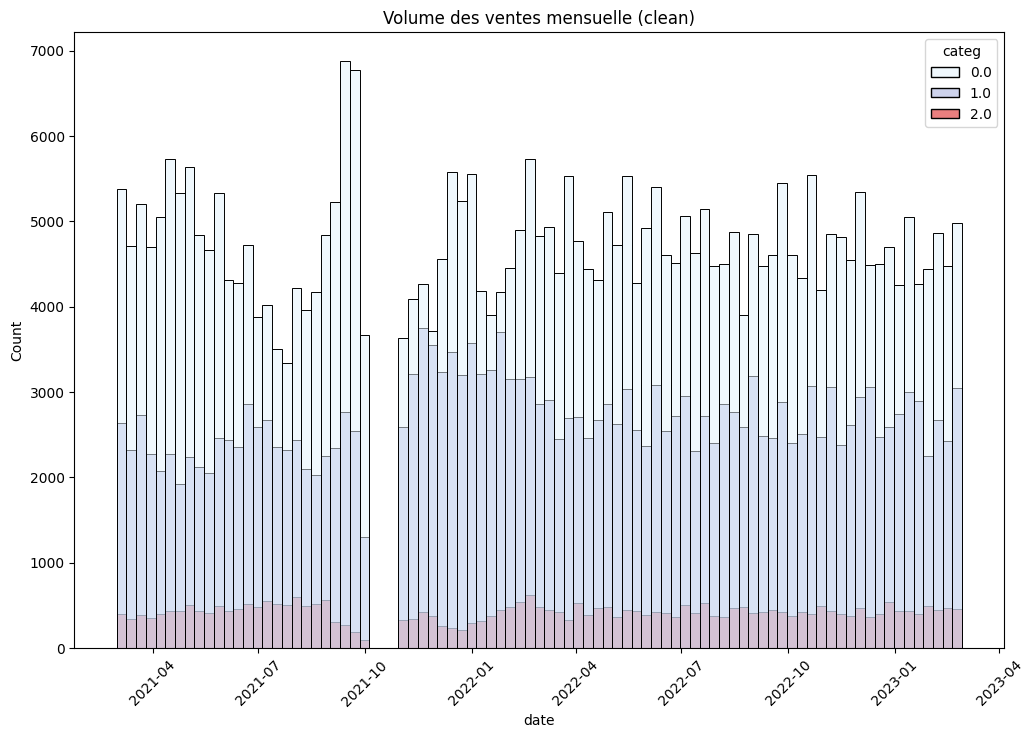

In [71]:
plt.figure(figsize=(12,8))
sns.histplot(data=Data_final, x='date',hue='categ', palette=['#e3f2fd','#9fa8da','#d50000'])
plt.xticks(rotation=45)
plt.title('Volume des ventes mensuelle (clean)')

# Décomposition en moyenne mobile 

Text(0, 0.5, "Chiffre d'affaire €")

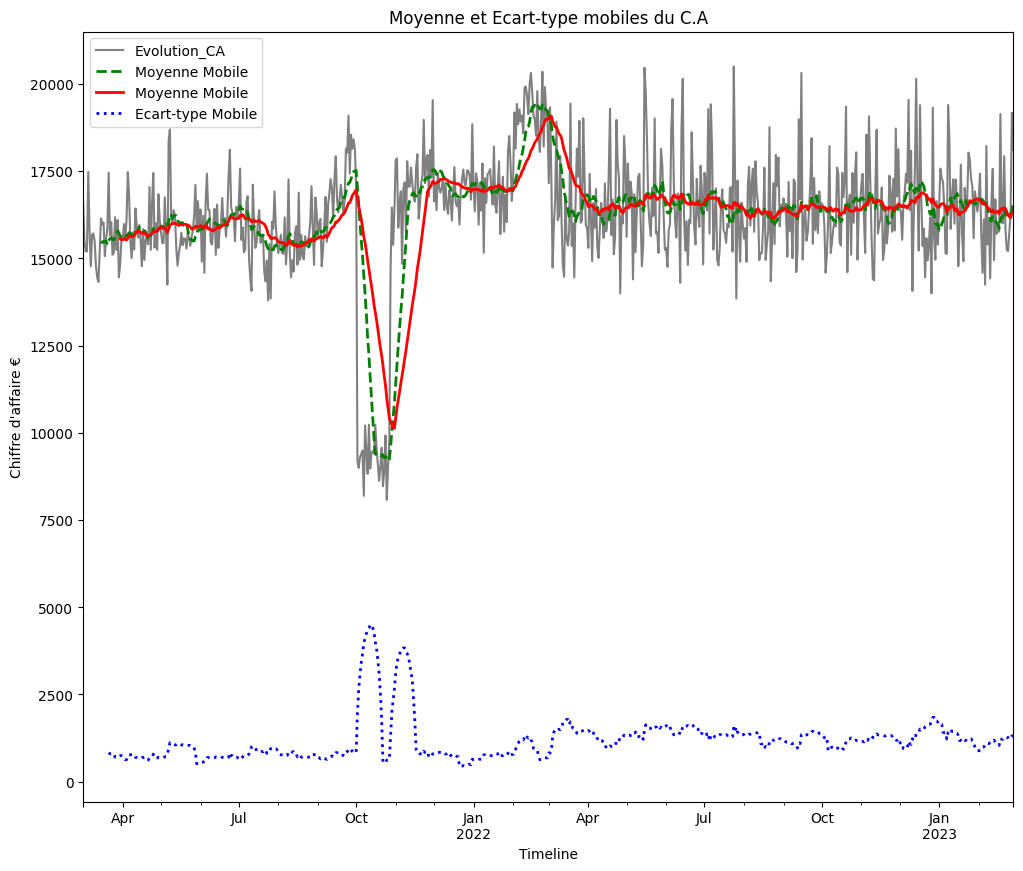

In [72]:
plt.figure(figsize=(12,10))
Evolution_CA['price'].plot(label='Evolution_CA',c='grey')
Mo_average= Evolution_CA['price'].rolling(window=15).mean().plot(label='Moyenne Mobile',linestyle='--',c='green',lw=2)
Mo_average= Evolution_CA['price'].rolling(window=30).mean().plot(label='Moyenne Mobile',c='red',lw=2)
Rolling_std=Evolution_CA['price'].rolling(window=21).std().plot(label='Ecart-type Mobile',linestyle=':',lw=2,c='blue')
plt.legend(loc = 'best')
plt.title('Moyenne et Ecart-type mobiles du C.A')
plt.xlabel('Timeline')
plt.ylabel("Chiffre d'affaire €")

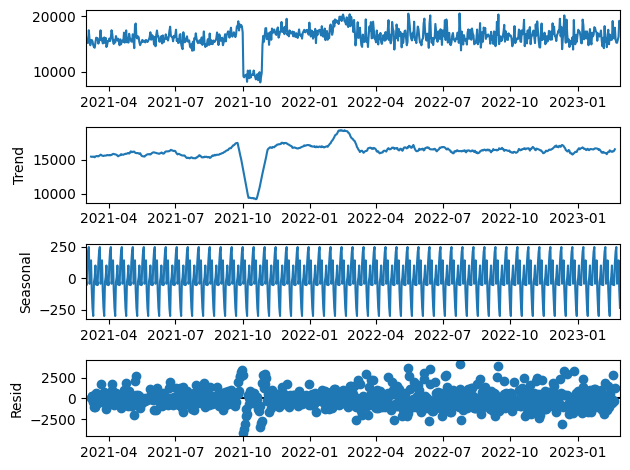

In [73]:
decomp_CA = seasonal_decompose(Evolution_CA,  model='additive', period=15)
decomp_CA.plot()
plt.show()

# Les Références

In [74]:
print("Le nombre de référence par catégorie est de :\n",Produits.groupby(["categ"])["id_prod"].count())
print("Le chiffre d'affaire par catégorie est de :\n",Data_final.groupby(by='categ')['price'].sum(),)
print("Le nombre de vente par catégorie est de :\n",Data_final.groupby(by='categ')['session_id'].count())
print("Le Prix Moyen est de :\n",Data_final.groupby(by='categ')['price'].mean())

Le nombre de référence par catégorie est de :
 categ
0    2309
1     739
2     239
Name: id_prod, dtype: int64
Le chiffre d'affaire par catégorie est de :
 categ
0.0    4222618.00
1.0    4619960.37
2.0    2692489.43
Name: price, dtype: float64
Le nombre de vente par catégorie est de :
 categ
0.0    396911
1.0    225503
2.0     35312
Name: session_id, dtype: int64
Le Prix Moyen est de :
 categ
0.0    10.638702
1.0    20.487357
2.0    76.248568
Name: price, dtype: float64


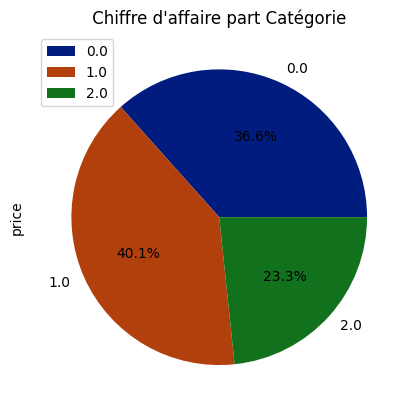

In [75]:
colors = sns.color_palette('dark')[0:5]
Data_final.groupby(by='categ')['price'].sum().plot( kind='pie',legend=True, autopct='%1.1f%%',colors=colors, y='price')

plt.title(" Chiffre d'affaire part Catégorie ")
plt.show()

Contrairement à la répartition des transactions ,la répartition du chiffre d'affaire est  plus importante pour les catégories 1 et 2

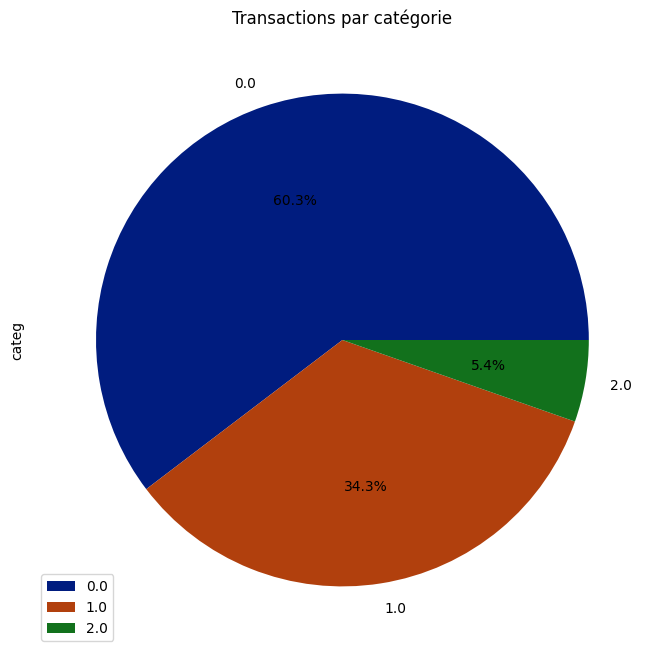

In [76]:

Data_final['categ'].value_counts(normalize=True).plot(figsize=(10,8), kind='pie',legend=True, autopct='%1.1f%%',colors=colors)

plt.title('Transactions par catégorie')
plt.show()

La répartition des transactions est plus importante pour la catégorie 0 viens ensuite la catégorie 1 ce qui s'explique notamment par les différentes gammes de prix des catégories

In [77]:
# Calcul de la Fréquence  de la variable qualitative CATEG
effectif= Data_final['categ'].value_counts()
modalite= effectif.index

eff= pd.DataFrame(modalite,columns=['categ'])
eff['n']= effectif.values
eff['f']= eff['n']/len(Data_final)
eff['F']=eff['f'].cumsum()
eff


,categ,n,f,F
0,0.0,396911,0.603459,0.603459
1,1.0,225503,0.342852,0.946312
2,2.0,35312,0.053688,1.000000


In [78]:
# Le top des 10 références best & flop

In [79]:
Ventes_réf=Data_final.groupby(['id_prod'])['session_id'].count()

print("Les références les plus vendues sont:\n",Ventes_réf.nlargest(10))

print("Les références ont le moins de succès sont:\n",Ventes_réf.nsmallest(10))

Les références les plus vendues sont:
 id_prod
1_369    2237
1_417    2173
1_414    2166
1_498    2117
1_425    2084
1_403    1950
1_412    1938
1_406    1931
1_413    1931
1_407    1923
Name: session_id, dtype: int64
Les références ont le moins de succès sont:
 id_prod
0_1151    1
0_1284    1
0_1498    1
0_1533    1
0_1539    1
0_1595    1
0_1601    1
0_1633    1
0_1683    1
0_1728    1
Name: session_id, dtype: int64


Les meilleurs Ventes se répartissent principalement dans la catégorie 1, en ce qui concerne les ventes les plus faibles elles concernent la categ 0

In [80]:
Ca_prod=pd.pivot_table(Data_final,index='id_prod',values='price',aggfunc='sum')

In [81]:
Ca_prod.sort_values(by='price').head(10)

,price
id_prod,
0_1539,0.99
0_898,1.27
0_1284,1.38
0_643,1.98
0_1653,1.98
0_807,1.99
0_541,1.99
0_1601,1.99
0_1728,2.27


Les références qui génère le moin de chiffre d'affaire nous pouvons voir que le top 10 est principalement composé d'élément de la catégorie 0

In [82]:
Ca_prod.sort_values(by='price',ascending=False).head(10)

,price
id_prod,
2_159,92265.68
2_135,67403.23
2_112,62840.10
2_102,58962.58
2_209,55362.09
1_395,53950.39
1_369,53665.63
2_110,51916.50
1_414,51615.78


Les produits qui génèrent le plus de Ca 

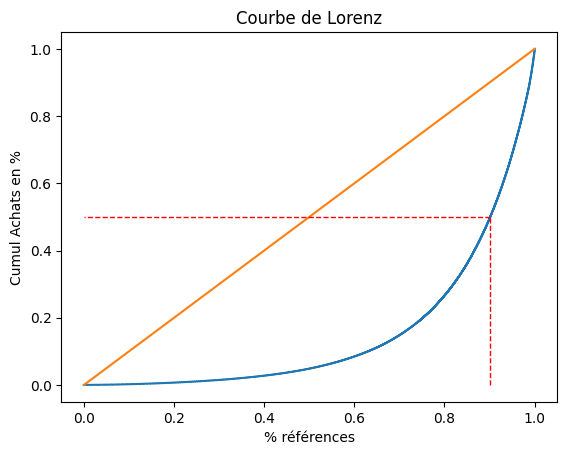

L'indice de Gini est de  0.695


In [83]:
lorenz = np.cumsum(np.sort(Ventes_réf)) / Ventes_réf.sum()
lorenz = np.append([0],lorenz) 
n = len(Ventes_réf)
xaxis = np.linspace(0-1/n,1+1/n,len(lorenz)) 
plt.plot(xaxis,lorenz,drawstyle='steps-post')
plt.plot([0,1], [0,1]) 
plt.vlines(x=.90, ymin=0, ymax=.5, color='red', linestyle='--', linewidth=1, label='Medial')
plt.hlines(xmin=.90, xmax=0, y=.5, color='red', linestyle='--', linewidth=1)

plt.title('Courbe de Lorenz')
plt.xlabel('% références')
plt.ylabel('Cumul Achats en %')
plt.show()

AUC = (lorenz.sum() -lorenz[-1]/2 -lorenz[0]/2)/n 
S = 0.5 - AUC
Gini = round(2*S,3)
print("L'indice de Gini est de ",Gini,)

On peut voir de manière général que la courbe montre une répartiton inégale du Chiffre d'affaire en fonction des ventes de produits confirmé par l'indice de Gini élevé 

# Profils Clientèles

In [84]:
# Nous allons d'abord déterminer l'âge de nos clients et le nombre de vente
Data_final['Age']=2023-Data_final['birth']
Data_final = Data_final.assign(vente= 1) 
#Changement de l'ordre des colonnes 
Data_final= Data_final.reindex(columns=['id_prod','date','session_id','client_id','price','categ','vente','sex','birth','Age','Année','Mois','Jour'])
Data_final

,id_prod,date,session_id,client_id,price,categ,vente,sex,birth,Age,Année,Mois,Jour
0,0_1518,2022-05-20,s_211425,c_103,4.18,0.0,1,f,1986,37,2022,5,20
1,1_251,2022-02-02,s_158752,c_8534,15.99,1.0,1,m,1988,35,2022,2,2
2,0_1277,2022-06-18,s_225667,c_6714,7.99,0.0,1,f,1968,55,2022,6,18
3,2_209,2021-06-24,s_52962,c_6941,69.99,2.0,1,m,2000,23,2021,6,24
4,0_1509,2023-01-11,s_325227,c_4232,4.99,0.0,1,m,1980,43,2023,1,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
679401,0_1551,2022-01-15,s_150195,c_8489,12.99,0.0,1,f,1951,72,2022,1,15
679402,1_639,2022-03-19,s_181434,c_4370,10.99,1.0,1,f,1977,46,2022,3,19
679403,0_1425,2022-12-20,s_314704,c_304,12.99,0.0,1,f,1988,35,2022,12,20
679404,0_1994,2021-07-16,s_63204,c_2227,4.98,0.0,1,m,1986,37,2021,7,16


In [85]:
# Création d'une variable tranche d'âge
Data_final['age_cat']=pd.cut(Data_final['Age'],bins=[0,20,30,40,50,60,70,80,95],right=True)


In [86]:
# Analyse des 10 meilleurs clients 
Best_Clients=Data_final.groupby(['client_id'])[['price']].sum().sort_values(by='price',ascending=False).reset_index()
Clts=Data_final.groupby(['client_id'])['price'].sum()
print("Le top 10 des clients qui achètent le plus :\n",Best_Clients.head(10),)


Le top 10 des clients qui achètent le plus :
   client_id      price
0    c_1609  312755.08
1    c_4958  282654.61
2    c_6714  149843.69
3    c_3454  111796.68
4    c_2899    5214.05
5    c_1570    5136.14
6    c_3263    5129.89
7    c_7319    5120.55
8    c_8026    4979.40
9    c_5263    4964.87


In [87]:
# On peut voir  pour les 4 premiers clients qu'ils ont une forte capacité d'achat nous pouvons penser qu'ils s'agit de client b2B (librairie..)
c_1609=Data_final.loc[Data_final['client_id']=='c_1609']
c_4958=Data_final.loc[Data_final['client_id']=='c_4958']
c_6714=Data_final.loc[Data_final['client_id']=='c_6714']
c_3454=Data_final.loc[Data_final['client_id']=='c_3454']


In [88]:
# il faut maintenant déterminer les différents type de client
Data_final['type_client']='B2C'
Data_final['type_client'].loc[Data_final[Data_final['client_id'].isin(Best_Clients.head(4)['client_id'])].index]='B2B'

# Nous pouvons à présents séparer les clients des clients professionels
B2B=Data_final[Data_final['type_client']=='B2B']
B2C=Data_final[Data_final['type_client']=='B2C']


C:\Users\33682\AppData\Local\Temp\ipykernel_26424\2366432425.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data_final['type_client'].loc[Data_final[Data_final['client_id'].isin(Best_Clients.head(4)['client_id'])].index]='B2B'


Text(0.5, 1.0, 'Volume des Ventes par Types Clients')

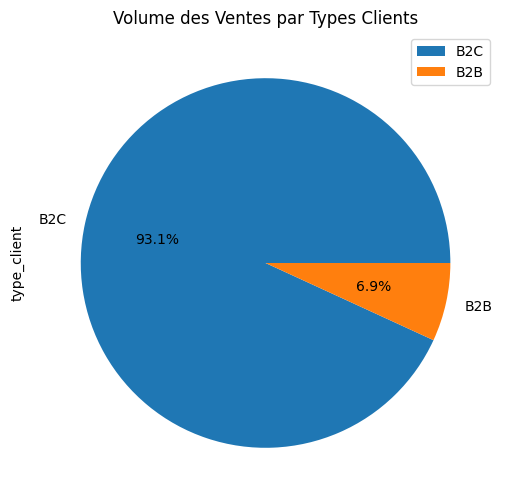

In [89]:
# Nous pouvons maintenant représenter de manière graphique le volume des ventes
plt.figure(figsize=(6,6))
Data_final['type_client'].value_counts(normalize=True).plot(kind='pie',legend=True,autopct='%1.1f%%')
plt.title('Volume des Ventes par Types Clients')

In [90]:
c_1609.groupby(['client_id','id_prod'])[['id_prod']].count()

id_prod
client_id id_prod         
c_1609    0_0           64
          0_1           14
          0_10           2
          0_1000        22
          0_1001        14
...                    ...
          1_95           6
          1_97           5
          1_98           9
          2_159         10
          2_46           1

[1873 rows x 1 columns]

In [91]:
c_4958.groupby(['client_id','id_prod'])[['id_prod']].count()

id_prod
client_id id_prod         
c_4958    0_525          1
          1_10           1
          1_103          2
          1_105          3
          1_108          2
...                    ...
          2_9           32
          2_91           3
          2_94           1
          2_96          41
          2_97           2

[460 rows x 1 columns]

In [92]:
c_6714.groupby(['client_id','id_prod'])['id_prod'].count()

client_id  id_prod
c_6714     0_0        19
           0_1         4
           0_1000     11
           0_1001      6
           0_1002     10
                      ..
           2_43        9
           2_46        6
           2_62        5
           2_7         9
           2_96        4
Name: id_prod, Length: 1343, dtype: int64

In [93]:
c_3454.groupby(['client_id','id_prod'])['id_prod'].count()

client_id  id_prod
c_3454     0_0        10
           0_1         2
           0_1000      1
           0_1001      1
           0_1004      1
                      ..
           2_159       1
           2_160       3
           2_184       1
           2_19        2
           2_41        3
Name: id_prod, Length: 1066, dtype: int64

In [94]:
# Il est possible de déterminer différentes variable d'analyse des ventes tel que le nombre d'achat et leur montant
Achats_moyen=Data_final.groupby(['client_id','Année'])['session_id'].count().mean()
Montant_achat_moyen=Data_final.groupby(['client_id','Année'])['price'].sum().mean()
print("Le nombre d'achat par session client et par an est de",round(Achats_moyen,2))
print("Le montant d'achat par session client et par an est de ",round(Montant_achat_moyen,2),'€')

Le nombre d'achat par session client et par an est de 27.21
Le montant d'achat par session client et par an est de  477.13 €


In [95]:
# Nous pouvons déterminer le montant du panier moyen toute catégorie et client confondu
Panier_moyen=Data_final.groupby(['client_id'])['price'].sum()/Data_final.groupby(['client_id'])['session_id'].count()
print("Le Panier moyen est de",round(Panier_moyen.mean(),2),"€")

Le Panier moyen est de 22.09 €


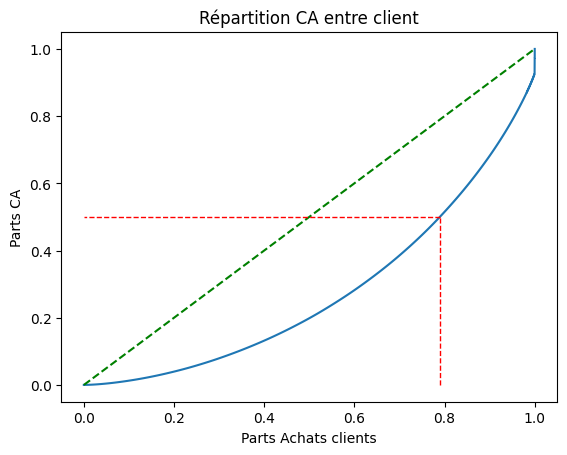

L'indice de Gini est de  0.447


In [96]:
# Nous allons pouvoir mettre en place une courbe de Lorenz afin de déterminer la part de Ca des clients
lorenz = np.cumsum(np.sort(Clts))/Clts.sum()
lorenz = np.append([0],lorenz) 
n = len(Clts)
xaxis = np.linspace(0-1/n,1+1/n,len(lorenz)) 
plt.plot(xaxis,lorenz,drawstyle='steps-post')
plt.plot([0,1], [0,1],ls='--',c='green') 
plt.vlines(x=.79, ymin=0, ymax=.5, color='red', linestyle='--', linewidth=1, label='Medial')
plt.hlines(xmin=.79, xmax=0, y=.5, color='red', linestyle='--', linewidth=1)
plt.title('Répartition CA entre client')
plt.xlabel( 'Parts Achats clients')
plt.ylabel('Parts CA')
plt.show()

# L'indice de Gini
AUC = (lorenz.sum() -lorenz[-1]/2 -lorenz[0]/2)/n 
S = 0.5 - AUC
Gini = round(2*S,3)
print("L'indice de Gini est de ",Gini,)

ici nous pouvons voir que 80 % des clients les modestes font 50 % du CA à l'inverse nous pouvons dire que 20 % des clients les plus importants font 50 % du CA

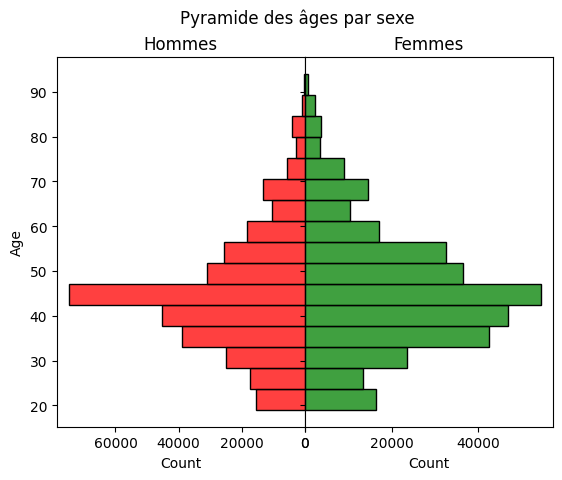

In [97]:
# Mise en place d'une pyramide des âges
fig, axes = plt.subplots(1, 2)
fig.suptitle('Pyramide des âges par sexe')

# Création des différents des histogrammes
sns.histplot(ax=axes[0], y=Data_final[Data_final['sex']=='m']['Age'], bins=16,color='red')
axes[0].invert_xaxis()
axes[0].set_title('Hommes')

sns.histplot(ax=axes[1], y=Data_final[Data_final['sex']=='f']['Age'], bins=16,color='green')
axes[1].set_yticklabels([])
axes[1].set_ylabel('')
axes[1].set_title('Femmes')

plt.subplots_adjust(wspace=0, hspace=0)

Nous avons une pyramide des âges dans l'ensemble plutôt équilibré 

# Demande de Julie

La répartion entre les hommes et les femmes est de 
: sex
f    319004
m    293622
Name: client_id, dtype: int64


([<matplotlib.patches.Wedge at 0x23eb4fa3190>,
 [Text(-0.4426492865629381, 1.007006260708106, 'Femmes'),
  Text(0.4426491922802051, -1.007006302151919, 'Hommes')],
 [Text(-0.24144506539796623, 0.5492761422044214, '52.1%'),
  Text(0.24144501397102094, -0.5492761648101376, '47.9%')])

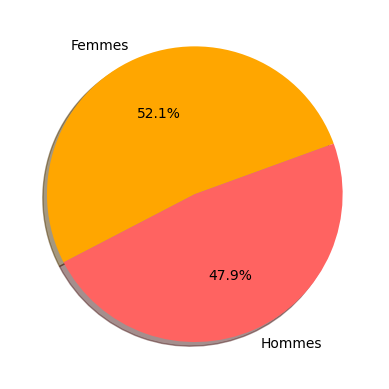

In [134]:
# Nous pouvons déterminer la répartition Hommes/Femmes
répartition_H_F= B2C.groupby(['sex'])['client_id'].count()

print("La répartion entre les hommes et les femmes est de \n:",répartition_H_F,)

plt.pie(répartition_H_F,labels=['Femmes','Hommes'],autopct='%1.1f%%',colors=['#ffa600','#ff6361'],startangle=20,shadow=True)

La répartion du Chiffre d'affaire entre les hommes et les femmes est de 
: sex
f    5555669.85
m    5122347.89
Name: price, dtype: float64
Le nombre d'achat entre les hommes et les femmes est de 
: sex
f    319004
m    293622
Name: price, dtype: int64
Le montant moyen d'achat pour les hommes et les femmes est de 
: sex
f    17.0
m    18.0
Name: price, dtype: float64


([<matplotlib.patches.Wedge at 0x23eb4fea7a0>,
 [Text(-0.07007102561870156, 1.0977659365132184, 'Femmes'),
  Text(0.0700710256187019, -1.0977659365132184, 'Hommes')],
 [Text(-0.038220559428382664, 0.5987814199163008, '52.0%'),
  Text(0.03822055942838285, -0.5987814199163008, '48.0%')])

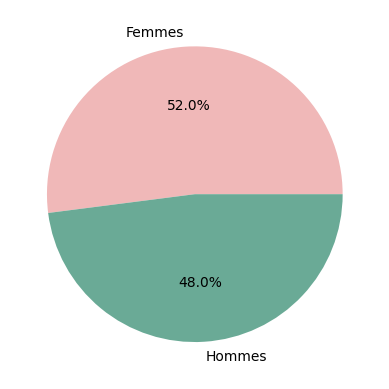

In [135]:
Répartion_CA_genre=B2C.groupby(['sex'])['price'].sum()
print("La répartion du Chiffre d'affaire entre les hommes et les femmes est de \n:",Répartion_CA_genre,)

Nombre_achat=B2C.groupby(['sex'])['price'].count()
print("Le nombre d'achat entre les hommes et les femmes est de \n:",Nombre_achat,)

Moyenne_achat=round(Data_final.groupby(['sex'])['price'].mean(),)
print("Le montant moyen d'achat pour les hommes et les femmes est de \n:",Moyenne_achat,)

plt.pie(Répartion_CA_genre,labels=['Femmes','Hommes'],autopct='%1.1f%%',colors=['#f0b8b8','#6aaa96'])

# Les corrélations

In [100]:
# La réalisation d'une corrélation va nous permettre de déterminer les premières corrélations que nous pouvons voir entre nos variables
B2C.corr()

C:\Users\33682\AppData\Local\Temp\ipykernel_26424\1218885770.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  B2C.corr()


,price,categ,vente,birth,Age,Année,Mois,Jour
price,1.000000,0.667262,NaN,0.196857,-0.196857,0.009611,-0.007188,0.000454
categ,0.667262,1.000000,NaN,0.082157,-0.082157,0.018753,-0.004689,-0.004177
vente,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
birth,0.196857,0.082157,NaN,1.000000,-1.000000,0.000419,-0.005158,0.005205
Age,-0.196857,-0.082157,NaN,-1.000000,1.000000,-0.000419,0.005158,-0.005205
Année,0.009611,0.018753,NaN,0.000419,-0.000419,1.000000,-0.362274,-0.017372
Mois,-0.007188,-0.004689,NaN,-0.005158,0.005158,-0.362274,1.000000,0.018423
Jour,0.000454,-0.004177,NaN,0.005205,-0.005205,-0.017372,0.018423,1.000000


C:\Users\33682\AppData\Local\Temp\ipykernel_26424\922930306.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(B2C.corr(),annot=True,fmt=".2f",cmap="crest")


<AxesSubplot: >

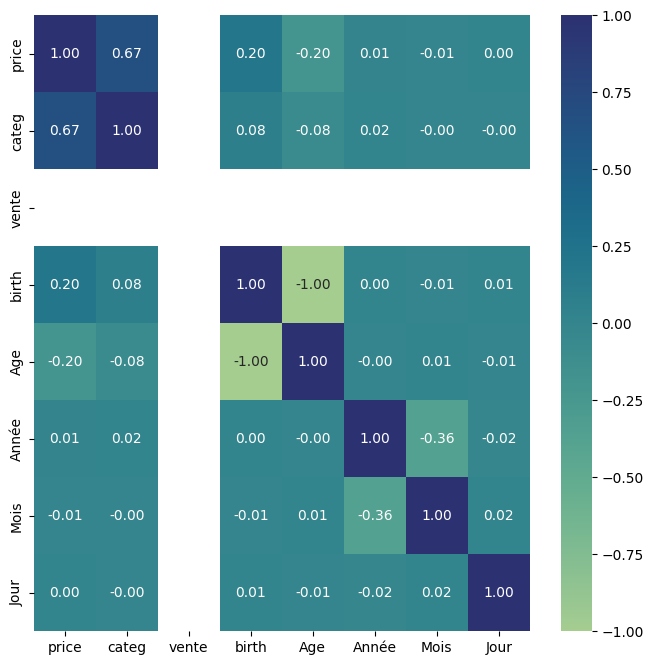

In [101]:
# Réalisation d'une Heatmap pour affirmer les corrélations existantes
plt.figure(figsize=(8,8))
sns.heatmap(B2C.corr(),annot=True,fmt=".2f",cmap="crest")

On peut voir des corrélations apparaitre notamment entre nos principales variables prix et categories

# Test student 

Le test t de Student, est un outil permettant d'évaluer les moyennes d'une ou deux populations à l'aide d'un test d'hypothèse.

Question: Est ce que la moyenne prix influe sur le sexe ?


Avec un risque premier alpha de 5%, on émets les deux hypothèses suivantes:
H0:la variable suit une distribution normale P>0,05
H1:la variable ne suit pas une distribution normale P<0,05

In [102]:
groupe1=B2C['price'][B2C['sex'] == 'm']
groupe2= B2C['price'][B2C['sex'] == 'f']

# Test de Kolmogorov-Smirnov - vérification de la normalité

In [103]:
from scipy.stats import ks_2samp
ks_2samp(groupe1, groupe2)

KstestResult(statistic=0.003164886349826146, pvalue=0.09329452423326423)

La P-value > 0.05 donc la variable suit une loi normale

In [104]:
# Independent t-test prix/sex
rp.ttest(group1= B2C['price'][B2C['sex'] == 'm'], group1_name= "Homme",
         group2= B2C['price'][B2C['sex'] == 'f'], group2_name= "Femme")

C:\Users\33682\AppData\Local\Programs\Python\Python310\lib\site-packages\researchpy\ttest.py:38: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  groups = group1.append(group2, ignore_index= True)


(   Variable         N       Mean         SD        SE  95% Conf.   Interval
 0     Homme  293622.0  17.445382  18.267186  0.033711  17.379308  17.511455
 1     Femme  319004.0  17.415675  17.946794  0.031775  17.353396  17.477953
 2  combined  612626.0  17.429913  18.101052  0.023126  17.384586  17.475240,
               Independent t-test      results
 0  Difference (Homme - Femme) =        0.0297
 1          Degrees of freedom =   612624.0000
 2                           t =        0.6417
 3       Two side test p value =        0.5210
 4      Difference < 0 p value =        0.7395
 5      Difference > 0 p value =        0.2605
 6                   Cohen's d =        0.0016
 7                   Hedge's g =        0.0016
 8              Glass's delta1 =        0.0016
 9            Point-Biserial r =        0.0008)

 H0: La différence entre les moyennes est égale 0
H1: La différence entre les moyennes est différente de 0

H1 retenu car P-value> et différent de 0 il y a donc une différence entre les hommes et les femmes sur les prix des livres achetés 

# Catégorie et Sexe

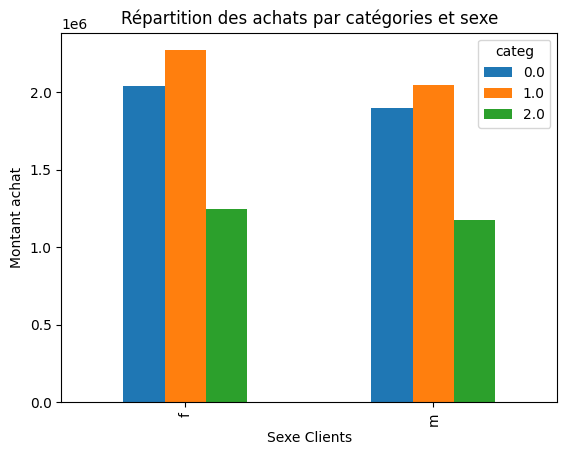

In [105]:
# Répartition des ventes par catégorie et par sexe

Tendances=B2C.pivot_table(index='sex', columns='categ', values='price', aggfunc=sum).reset_index()

Tendances.plot(kind='bar', x='sex')

plt.title('Répartition des achats par catégories et sexe')
plt.xlabel('Sexe Clients')
plt.ylabel('Montant achat')
plt.show()

# Test Chi² ou Test d'indépendance

Question: Il y'a t'-il une dépendance entre les variables catégories et sexe ? Oui/Non  


    Avec un risque Alpha de 5%
    H0: P-value>0,05 les variables sont indépendantes
    H1: P-value<0,05 les variables sont dépendantes

In [106]:
# Nous allons pouvoir déterminer notre tableau de contingence
X='sex'
Y='categ'

cont=B2C[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total")
print(cont)

#chi²
c, p, dof, expected = chi2_contingency(cont.iloc[:-1,:-1])
print("p-value est de",p,)
print("le test Chi² est de ",c,)

# Nous pouvons déterminer le V de cramer qui peut s interpréter comme l écart au carré entre les effectifs théoriques et observés, ramené à un intervalle de 0 à 1 (ou légèrement inférieur à 1)

N = len(B2C)
minimum_dimension = min(cont.shape)-1
  


categ     0.0     1.0    2.0   Total
sex                                 
f      192025  110550  16429  319004
m      178044  100227  15351  293622
Total  370069  210777  31780  612626
p-value est de 8.448460261159054e-05
le test Chi² est de  18.75788251563821


In [107]:
if p > .05:
    print('H0: Les 2 variables sont indépendantes')
else:
    print('H1: Les 2 variables sont dépendantes')

H1: Les 2 variables sont dépendantes


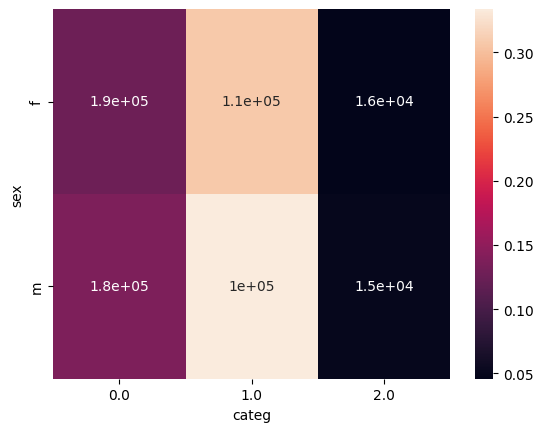

In [108]:
# Réalisation Heatmap
tx = cont.loc[:,["Total"]]
ty = cont.loc[["Total"],:]
n = len(B2C)
indep = tx.dot(ty) / n

c = cont.fillna(0) # On remplace les valeurs nulles par 0
measure = (c-indep)**2/indep
xi_n = measure.sum().sum()
table = measure/xi_n
sns.heatmap(table.iloc[:-1,:-1],annot=c.iloc[:-1,:-1])
plt.show()

Grâce à la Heatmap nous pouvons voir qu'il y a peu de variation entre nos différentes variables 

# Relation entre l'âge et Achat

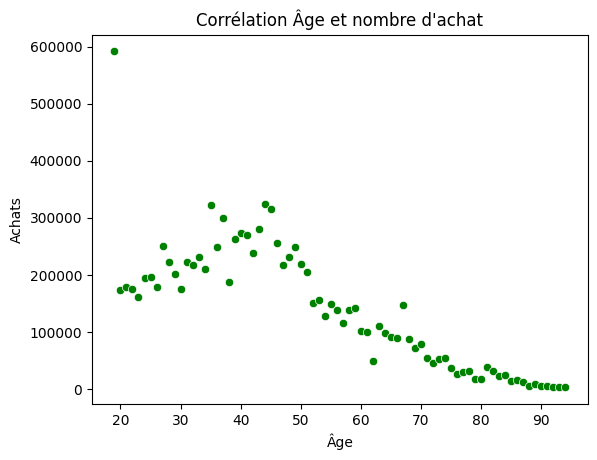

In [109]:
# On va maintenant déterminer la relation entre l'âge et les ventes 

# Création de nos variables
V_client=B2C.groupby(['Age'])['client_id'].count()
V_achat=B2C.groupby(['Age'])['price'].sum()

# Mise en place du graphique
sns.scatterplot(data=V_achat,c='green')
plt.title("Corrélation Âge et nombre d'achat")
plt.xlabel('Âge')
plt.ylabel('Achats')
plt.show()


Question: Il' y-a t-il corrélation entre l'âge et le nombre d'achat ? Oui/Non

    H0: p-value=0 il n'ya pas de corrélation
    H1: P-value≠0 il y'a une corrélation

In [110]:
print('Le coefficient de corrélation de Pearson est', st.pearsonr(V_achat,V_client))


Le coefficient de corrélation de Pearson est PearsonRResult(statistic=0.8237236992488421, pvalue=6.487354987050483e-20)


La P-value est négative il y a donc une corrélation entre nos deux variables ont peu rejetté l'hypothèse H0
Plus le nombre d'achat augmente plus l'âge d'achat diminue

Réponse: Oui

In [111]:
# Ajout d'une variable total achat

B2C=B2C.merge(B2C.pivot_table(
    index=['client_id'], values='price', 
    aggfunc='sum').reset_index().rename(
    columns={'price': 'Tot_achats'}),
    on='client_id', how='left')
B2C

,id_prod,date,session_id,client_id,price,categ,vente,sex,birth,Age,Année,Mois,Jour,age_cat,type_client,Tot_achats
0,0_1518,2022-05-20,s_211425,c_103,4.18,0.0,1,f,1986,37,2022,5,20,"(30, 40]",B2C,2118.62
1,1_251,2022-02-02,s_158752,c_8534,15.99,1.0,1,m,1988,35,2022,2,2,"(30, 40]",B2C,3389.69
2,2_209,2021-06-24,s_52962,c_6941,69.99,2.0,1,m,2000,23,2021,6,24,"(20, 30]",B2C,664.53
3,0_1509,2023-01-11,s_325227,c_4232,4.99,0.0,1,m,1980,43,2023,1,11,"(40, 50]",B2C,2286.88
4,0_1418,2022-10-20,s_285425,c_1478,8.57,0.0,1,f,1972,51,2022,10,20,"(50, 60]",B2C,3876.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
612621,0_1551,2022-01-15,s_150195,c_8489,12.99,0.0,1,f,1951,72,2022,1,15,"(70, 80]",B2C,1082.76
612622,1_639,2022-03-19,s_181434,c_4370,10.99,1.0,1,f,1977,46,2022,3,19,"(40, 50]",B2C,1170.78
612623,0_1425,2022-12-20,s_314704,c_304,12.99,0.0,1,f,1988,35,2022,12,20,"(30, 40]",B2C,1673.07
612624,0_1994,2021-07-16,s_63204,c_2227,4.98,0.0,1,m,1986,37,2021,7,16,"(30, 40]",B2C,2955.01


# Distribution des achats par rapport aux tranches d'âges

<AxesSubplot: xlabel='Age', ylabel='Tot_achats'>

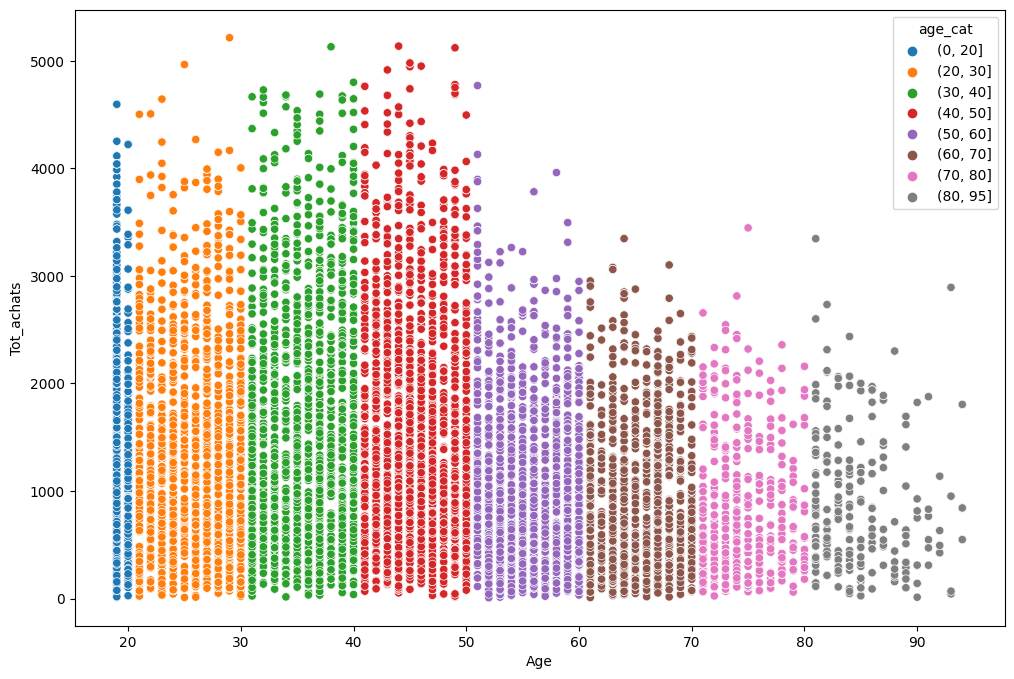

In [112]:
# Distribution des achats par rapport aux tranches d'âges

plt.figure(figsize=[12,8])
sns.scatterplot(data=B2C,x='Age',y='Tot_achats',hue='age_cat')

Question: Il' y-a t-il corrélation entre l'âge et le nombre d'achat ? Oui/Non


    H0: p-value=0 il n'ya pas de corrélation
    H1: P-value≠0 il y'a une corrélation

# Test de Pearson et Covariance

In [113]:
print('Le coefficient de corrélation de Pearson est', st.pearsonr(B2C["Age"],B2C["Tot_achats"]))
print('La Covariance est', np.cov(B2C["Age"],B2C["Tot_achats"],ddof=0)[1,0])

Le coefficient de corrélation de Pearson est PearsonRResult(statistic=-0.21528068802928896, pvalue=0.0)
La Covariance est -3263.191553071952


Après le Test de Pearson nous pouvons-voir que la P-value est égale à 0 
Nous allons confirmé cette absence de corrélation avec un test non paramétrique 

# Test de Spearman

In [114]:
coef, p = spearmanr(B2C['Age'], B2C['Tot_achats'])
print ('le coef de spearman est de', coef, 'la p value est', p)

le coef de spearman est de -0.20232694812324542 la p value est 0.0


Le test de spearman confirme ce que nous avons pu démontrer avec le test de Pearson avec une pvalue=0
Réponse:Non

Text(0.5, 1.0, "Répartition des achats en fonctions des catégories d'âge")

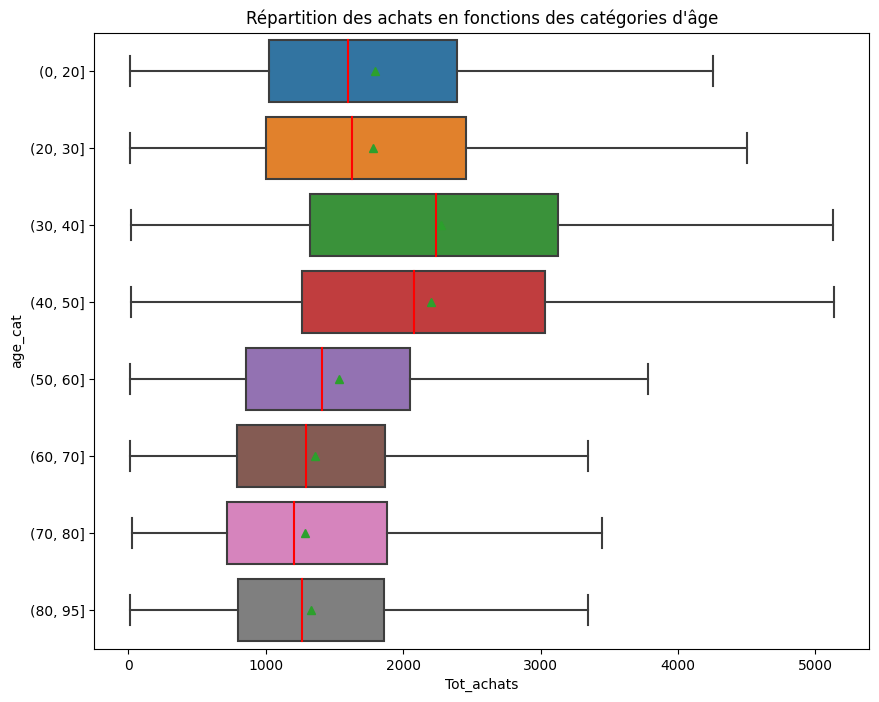

In [115]:
plt.figure(figsize=(10,8))
sns.boxplot(data=B2C,x='Tot_achats',y='age_cat',showfliers=False,medianprops={"color": "red"},showmeans=True)
plt.title("Répartition des achats en fonctions des catégories d'âge")

Nous pouvons voir que les 30-50 ans ont le plus d'impact sur nombre total d'achat et donc sur le chiffre d'affaire 

# Fréquence d'achat et Âge

In [116]:
# Création du dataset

Freq_mensuelle=B2C.groupby(['client_id','Age','sex'])['session_id'].count().reset_index()

# Mise en place de la fréquence 
Freq_mensuelle['f']=Freq_mensuelle['session_id']/sum(Freq_mensuelle['session_id'])
Freq_mensuelle

,client_id,Age,sex,session_id,f
0,c_1,68,m,38,0.000062
1,c_10,67,m,58,0.000095
2,c_100,31,m,8,0.000013
3,c_1000,57,f,122,0.000199
4,c_1001,41,m,96,0.000157
...,...,...,...,...,...
8589,c_995,68,m,14,0.000023
8590,c_996,53,f,94,0.000153
8591,c_997,29,f,58,0.000095
8592,c_998,22,m,53,0.000087


C:\Users\33682\AppData\Local\Temp\ipykernel_26424\58502971.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=Freq_mensuelle,x='Age',y='f',marker='o',palette='#003f5c')


Text(0.5, 1.0, "Fréquence d'achat par âge ")

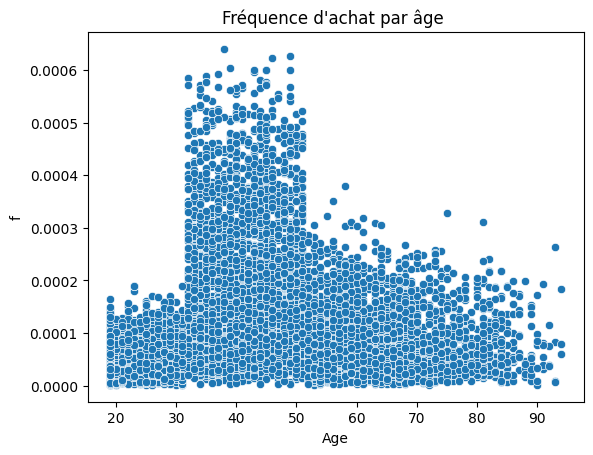

In [117]:
# Création graphique
sns.scatterplot(data=Freq_mensuelle,x='Age',y='f',marker='o',palette='#003f5c')

plt.title("Fréquence d'achat par âge ")

Grâce à ce nuage de point nous pouvons confirmer que c'est bien les clients âgés entre 30 et 50 qui font le plus d'achats

Question: Il' y-a t-il corrélation entre l'âge et la fréquence d'âchat ? Oui/Non


    H0: p-value=0 il n'ya pas de corrélation
    H1: P-value≠0 il y'a une corrélation

# Test de Pearson

In [118]:
print('Le coefficient de corrélation de Pearson est', st.pearsonr(Freq_mensuelle["Age"],Freq_mensuelle["f"]))
print('La P-value ≠ de 0 donc il y a une corrélation entre nos deux variables' )

Le coefficient de corrélation de Pearson est PearsonRResult(statistic=0.03286427358882093, pvalue=0.002311193635707138)
La P-value ≠ de 0 donc il y a une corrélation entre nos deux variables


# Test de Spearman

In [119]:
coef, p = spearmanr(Freq_mensuelle['Age'], Freq_mensuelle['f'])
print ('le coef de spearman est de', coef, 'la p value est', p)

le coef de spearman est de 0.12960358760068205 la p value est 1.6381331276761283e-33


Le Test de Spearman confirme par une p-value<0.05 la corrélation entre la frequence d'achats et l'âge du client


Réponse: Oui

# Taille du panier moyen et Âge

In [120]:
# Nous allons à présent déterminer la taille du panier moyen
T_panier_moyen=B2C.groupby(['client_id','Age'])[['session_id']].nunique().reset_index()
T_panier_moyen2=B2C.groupby(['client_id','Age'])[['vente','price']].sum().reset_index()

# Ajout des colonnes sur le dataset principal
T_panier_moyen[['achat','price']] = T_panier_moyen2[['vente','price']]

# Calcul de la Taille du panier moyen 
T_panier_moyen['Taille_panier_moyen']= T_panier_moyen['achat']/T_panier_moyen['session_id']

T_panier_moyen

,client_id,Age,session_id,achat,price,Taille_panier_moyen
0,c_1,68,32,38,550.19,1.187500
1,c_10,67,34,58,1353.60,1.705882
2,c_100,31,5,8,254.85,1.600000
3,c_1000,57,91,122,2209.92,1.340659
4,c_1001,41,44,96,1720.08,2.181818
...,...,...,...,...,...,...
8589,c_995,68,9,14,189.41,1.555556
8590,c_996,53,78,94,1611.59,1.205128
8591,c_997,29,23,58,1432.02,2.521739
8592,c_998,22,23,53,2779.88,2.304348


Text(0.5, 1.0, "Taille panier moyen en fonction de l'âge")

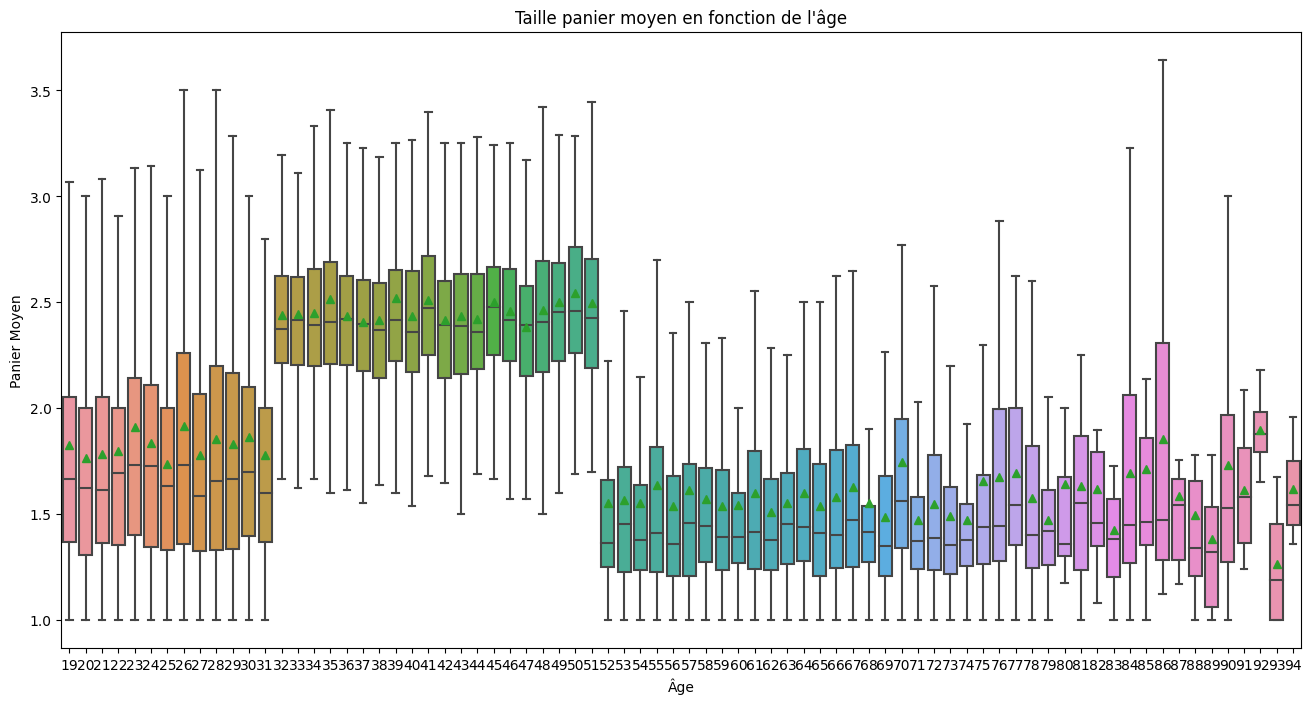

In [121]:
# Création schéma de la taille du panier moyen
plt.figure(figsize=(16,8))
sns.boxplot(data=T_panier_moyen,x='Age',y='Taille_panier_moyen', showfliers=False, showmeans=True)
plt.ylabel('Panier Moyen')
plt.xlabel('Âge')
plt.title("Taille panier moyen en fonction de l'âge")

Question: Il' y-a t-il corrélation entre la Taille du panier moyen et l'âge ? Oui/Non


    H0: p-value=0 il n'ya pas de corrélation
    H1: P-value≠0 il y'a une corrélation

# Test Pearson

In [122]:
print('Le coefficient de corrélation de Pearson est', st.pearsonr(T_panier_moyen["Age"],T_panier_moyen["Taille_panier_moyen"]))

Le coefficient de corrélation de Pearson est PearsonRResult(statistic=-0.20747028576652182, pvalue=3.3796142410166923e-84)


La P-value ≠ de 0 donc il y a une corrélation entre nos deux variables

# Test spearman

In [123]:
coef, p = spearmanr(T_panier_moyen['Age'], T_panier_moyen['Taille_panier_moyen'])
print ('le coef de spearman est de', coef, 'la p value est', p)

le coef de spearman est de -0.2035737548002492 la p value est 4.54040354964629e-81


On peut voir que nous avons bien une correlation négative modérée entre l'age et la taille du panier car P≠ de 0


Réponse:Oui


# Test Anova

Anova entre Age et Catégorie

Text(0.5, 1.0, 'Distribution des Âges et par Catégorie')

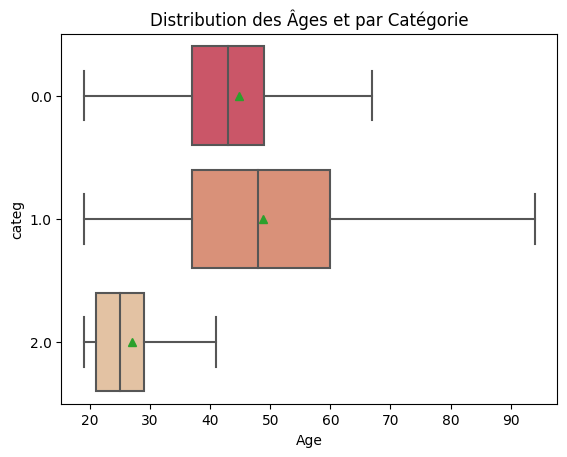

In [124]:
# On réalise la Distribution

sns.boxplot(data=B2C,x='Age', y='categ',palette=['#de425b','#e98969','#edc299'],
            orient='h',showfliers=False,showmeans=True)
plt.title("Distribution des Âges et par Catégorie")

On peut remarquer que les catégories 0 et 1 ont une moyenne d'âge assez proche contrairement à la catégorie 2 qui est plus en recul un test ANOVA va nous permettre de vérifier la corrélation entre ces notre variable quantitative et qualitative 

In [125]:
X = "categ" # qualitative
Y = "Age" # quantitative
sous_echantillon = B2C

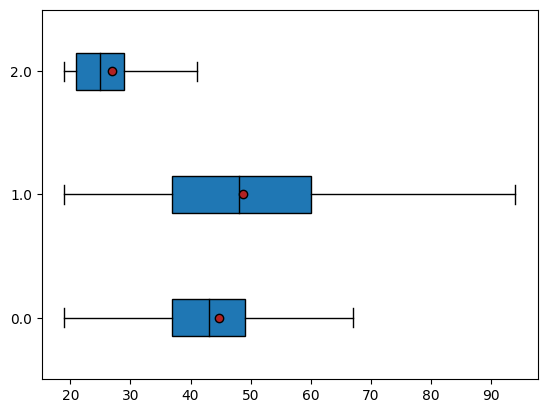

In [126]:
modalites = sous_echantillon[X].unique()
groupes = []
for m in modalites:
    groupes.append(sous_echantillon[sous_echantillon[X]==m][Y])

# Propriétés graphiques (pas très importantes)    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.show()

On peut voir que la disparité d'âge diffère en fonction des catégories la catégorie 2 est plus concentré entre les 20/30 ans pour la catéogrie 1 nous avons une forme plus dispersé avec une moyenne et une médiane très proche et pour la catégorie 0 l ces données représente les 40/50 ans malgré une forte disparité les concentrations reste pour la plupart sur des tranches d'âge de petite taille

# Eta² corrélation des variables

In [127]:
X = "categ" # qualitative
Y = "Age" # quantitative

def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT
    
eta_squared(sous_echantillon[X],sous_echantillon[Y])

0.11313227712747578

L'analyse de la variance notre η2 est de 0,11 ce qui montre une corrélation entre les catégories de livres et l'âge de nos clients 

# Régréssion linéraire avec OLS

A travers l'analyse de la variance on cherche à déterminer si :

H0 : Les moyennes de chaque groupe sont égales si p-value > 5%

H1 : Les moyennes de chaque groupe ne sont pas toutes égales < 5%

In [128]:

model = ols('Age ~ categ', data= B2C).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
categ,7.973907e+05,1.0,4163.127278,0.0
Residual,1.173398e+08,612624.0,NaN,NaN


~H0 : Les moyennes de chaque groupe sont égales si p-value > 5%~
H1 : Les moyennes de chaque groupe ne sont pas toutes égales < 5% 


il y aurait une dépendance entre l'âge et la catégorie des produits achetés.

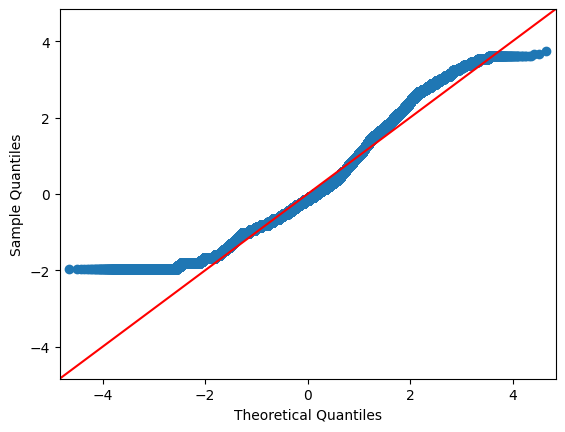

In [129]:
res = model.resid # residuals
fig = sm.qqplot(res,fit=True, line="45")
plt.show()

On appelle QQ-Plot normal le diagramme qui permet de comparer la distribution des données d’un lot à la distribution dite normale ou gaussienne
Nous pouvons voir ici une distribution quasiment normal de notre échantillon 

# Test Shapiro

H0 : Les résidus suivent une loi normale si p-value > 5%
H1 : Les résidus ne suivent pas une loi normale si p-value < 5%

In [130]:
X='categ'
Y='Age'
shapiro_categ=B2C[X].unique()
print(st.shapiro(shapiro_categ))

ShapiroResult(statistic=1.0, pvalue=0.999998927116394)


H0 : Les résidus de chaque groupe sont égales si p-value > 5%
~H1 : Les résiduss de chaque groupe ne sont pas toutes égales < 5%~ 

L'echantillon est donc normalment distribué 